In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from functools import reduce

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

path = r'./data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(len(df))
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

frame = pd.read_csv("./data/Fat_Supply_Quantity_Data.csv", index_col=None, header=0)

#frame = frame.drop(columns = ["Unit (all except Population)", "Categories", "Items", "Undernourished"])
frame = frame.drop(columns = ["Unit (all except Population)", "Undernourished"])
#Simon à détécter
#Relier nombre population 
#Using miss rangeer

#frame = pd.get_dummies(frame)

data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population']
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active']
data_food =  set(frame.columns) - set(data_covid)



frame = frame.dropna()


170
170
23
170
170


In [2]:
frame

Country  Alcoholic Beverages  Animal Products  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Spices  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetal Products  Vegetable Oils  Vegetables  Obesity  Confirmed    Deaths  Recovered    Active    Population
0                           Afghanistan               0.0000          21.6397       6.2224                   0.0000                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960  0.2776         0.0490      0.0980       0.0000              0.0000    0.7513           28.3684         17.0831      0.3593      4.5   0.112646  0.004226   0.090667  0.017753  3.892800e+07
1                               Albania               0.0000          32.0002       3.4172                   0.0000                    2.6734  1.6448         0.1445                   0.6418   8.7428         0.0170                  17.7576  0.2933    3.1622  0.1148  0.0000         0.0510      0.5270       0.0000              0.0000    0.9181           17.9998          9.2443      0.6503     22.3   1.051339  0.022763   0.500916  0.527660  2.838000e+06
2                               Algeria               0.0000          14.4175       0.8972                   0.0000                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698  0.1568         0.1129      0.2886       0.0000              0.0000    0.8595           35.5857         27.3606      0.5145     26.6   0.159229  0.004973   0.104439  0.049816  4.435700e+07
3                                Angola               0.0000          15.3041       1.3130                   0.0000                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282  0.0103         0.7078      0.1128       0.0000              0.0000    0.0308           34.7010         22.4638      0.1231      6.8   0.042808  0.001021   0.020365  0.021422  3.252200e+07
4                   Antigua and Barbuda               0.0000          27.7033       4.6686                   0.0000                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673  0.3591         0.0449      1.0549       0.0000              0.0000    0.2020           22.2995         14.4436      0.2469     19.1   0.141837  0.004082   0.129592  0.008163  9.800000e+04
5                             Argentina               0.0000          30.3572       3.3076                   0.0000                    1.3316  1.5706         0.1664                   0.2091  19.2693         0.0000                   5.8512  0.1878    0.0640  0.0213  0.0213         0.1110      0.2475       0.0000              0.0000    0.1366           19.6449         17.3147      0.1878     28.5   2.951577  0.080100   2.548591  0.322886  4.537700e+07
6                               Armenia               0.0000          29.6642       6.2619                   0.0000                    2.5068  1.6196         0.2218                   0.5468  10.8165         0.0361                  10.4709  0.2734    0.6602  0.0774  0.0103         0.0567      1.8002       0.0000              0.0000    0.9542           20.3384         12.8127      0.8717     20.9   4.075068  0.062212   2.708694  1.304161  2.956000e+06
7                             Australia               0.0000          24.1099       4.6030                   0.0000                    0.9908  0.7017         0.4515                   0.4028  11.6002         0.0520                   6.5196  0.2339    1.2929  0.0260  0.1007         0.0422      0.7926       0.0000              0.0000    1.6145           25.8901         20.3612      0.2144     30.4   

In [3]:
frame["Confirmed_finish"] = frame["Confirmed"] - frame["Active"]
frame["Recovered_percent"] = frame["Recovered"] * 100 / frame["Confirmed_finish"] 
frame["Deaths_percent"] = frame["Deaths"] * 100 / frame["Confirmed_finish"] 
frame = frame.dropna()


In [4]:
name_y = "Recovered_percent"

In [5]:
frame.head()

Country  Alcoholic Beverages  Animal Products  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Spices  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetal Products  Vegetable Oils  Vegetables  Obesity  Confirmed    Deaths  Recovered    Active  Population  Confirmed_finish  Recovered_percent  Deaths_percent
0          Afghanistan                  0.0          21.6397       6.2224                      0.0                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960  0.2776         0.0490      0.0980          0.0                 0.0    0.7513           28.3684         17.0831      0.3593      4.5   0.112646  0.004226   0.090667  0.017753  38928000.0          0.094893          95.546833        4.453167
1              Albania                  0.0          32.0002       3.4172                      0.0                    2.6734  1.6448         0.1445                   0.6418   8.7428         0.0170                  17.7576  0.2933    3.1622  0.1148  0.0000         0.0510      0.5270          0.0                 0.0    0.9181           17.9998          9.2443      0.6503     22.3   1.051339  0.022763   0.500916  0.527660   2838000.0          0.523679          95.653344        4.346656
2              Algeria                  0.0          14.4175       0.8972                      0.0                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698  0.1568         0.1129      0.2886          0.0                 0.0    0.8595           35.5857         27.3606      0.5145     26.6   0.159229  0.004973   0.104439  0.049816  44357000.0          0.109412          95.454545        4.545455
3               Angola                  0.0          15.3041       1.3130                      0.0                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282  0.0103         0.7078      0.1128          0.0                 0.0    0.0308           34.7010         22.4638      0.1231      6.8   0.042808  0.001021   0.020365  0.021422  32522000.0          0.021386          95.226456        4.773544
4  Antigua and Barbuda                  0.0          27.7033       4.6686                      0.0                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673  0.3591         0.0449      1.0549          0.0                 0.0    0.2020           22.2995         14.4436      0.2469     19.1   0.141837  0.004082   0.129592  0.008163     98000.0          0.133673          96.946565        3.053435

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeRegressor


In [7]:
name_y

'Recovered_percent'

import time 
time.sleep(4600)
!poweroff

In [44]:
sns.pairplot(frame[frame.columns[0:10]])
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fdafda7d310> (for post_execute):


KeyboardInterrupt: 

KeyboardInterrupt: 

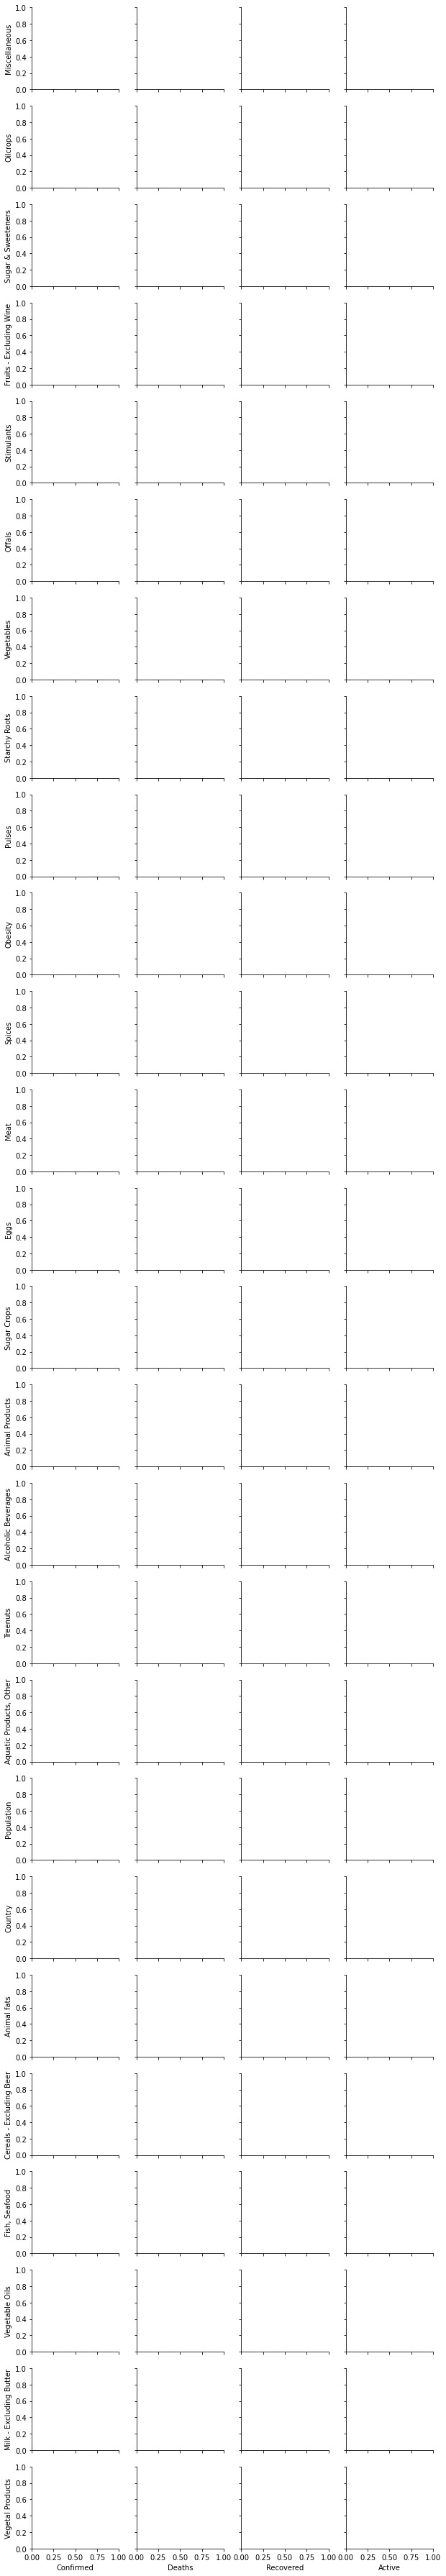

In [8]:
sns.pairplot(
    frame,
    x_vars=data_covid,
    y_vars=data_food,
)


In [12]:
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Deaths_percent', 'Recovered_percent', 'Confirmed_finish']

frame_cov = frame[data_covid].sort_values("Confirmed", ascending=True)
frame_food = frame.drop(columns=data_covid + ["Country"])

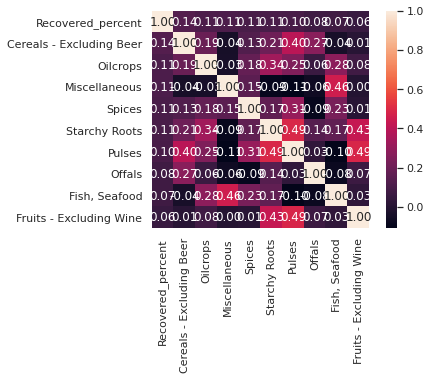

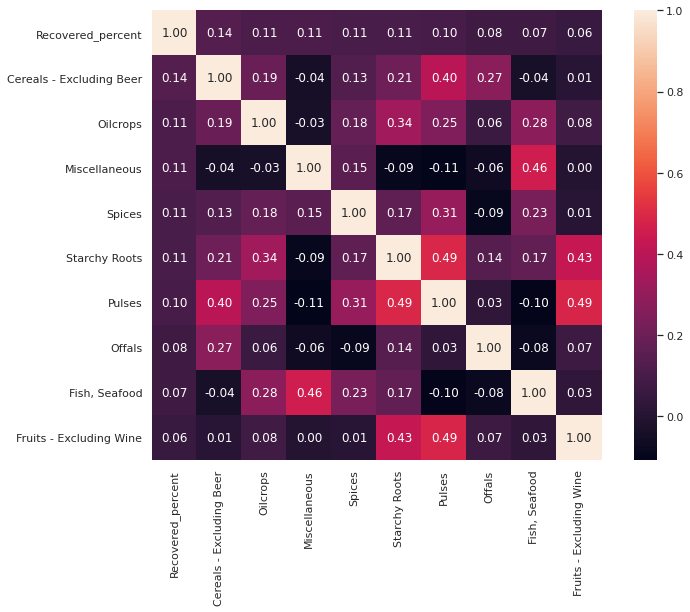

In [13]:
frame_food = frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                                 "Vegetal Products", "Animal Products", "Obesity",
                                 "Confirmed_finish", "Recovered", "Deaths_percent"])
correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)


(array([76., 20., 21., 10.,  8., 10.,  6.,  3.,  1.,  4.]),
 array([3.45208506e-04, 4.74289845e-01, 9.48234482e-01, 1.42217912e+00,
        1.89612376e+00, 2.37006839e+00, 2.84401303e+00, 3.31795767e+00,
        3.79190230e+00, 4.26584694e+00, 4.73979158e+00]),
 <BarContainer object of 10 artists>)

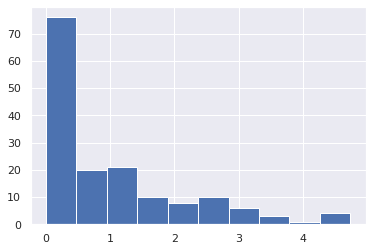

In [14]:
a = plt.hist(frame_cov["Confirmed"])
a

In [11]:
inds = []
prec = 0
grouped_index = []
cpt = 0
fus = []
for i in a[0]:
    if cpt < 3:
        fus += list(frame_cov[int(prec):int(prec+i)].index.values)
    cpt += 1
    #print(i)
    print(frame_cov[int(prec):int(prec+i)].index.values)
    grouped_index.append(frame_cov[int(prec):int(prec+i)].index.values)    
    prec += i
    
grouped_index[0 : 3] = [reduce(lambda i, j: np.array(list(i) + list(j)), grouped_index[0 : 3])] 
#grouped_index[1 : ] = [reduce(lambda i, j: np.array(list(i) + list(j)), grouped_index[1 : ])] 
grouped_index

NameError: name 'a' is not defined

In [15]:
def entity_distance(ent1, ent2):
    cent1 = np.mean(ent1)
    cent2 = np.mean(ent2)
    print(cent1, cent2)
    return np.linalg.norm(cent1-cent2)

In [16]:
distances = np.ones((len(grouped_index), len(grouped_index)), dtype=np.float)

for i in range(len(grouped_index)):
    for j in range(len(grouped_index)):
        if i < j:
            continue
        distances[i, j] = entity_distance(frame_food.loc[grouped_index[i]], frame_food.loc[grouped_index[j]])

for i in range(len(grouped_index)):
    for j in range(len(grouped_index)):
        if i < j:
            distances[i, j] = distances[j, i]
pd.DataFrame(distances)

Empty DataFrame
Columns: []
Index: []

In [10]:
frame_food.loc[grouped_index[i]]

NameError: name 'frame_food' is not defined

Confirmed Miscellaneous


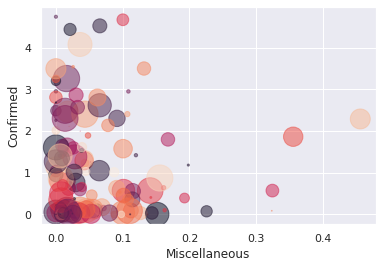

Confirmed Oilcrops


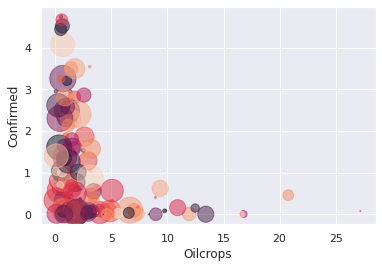

Confirmed Stimulants


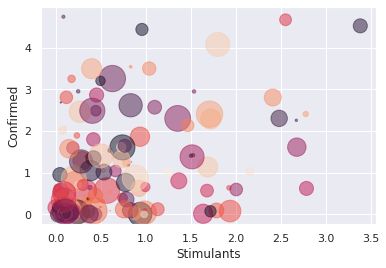

Confirmed Vegetables


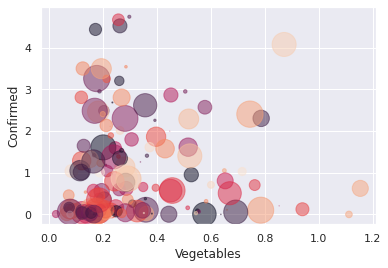

Confirmed Pulses


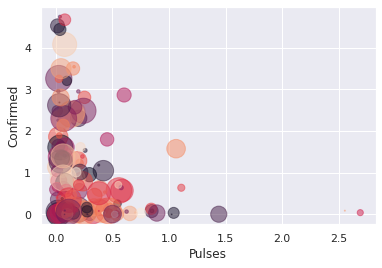

Confirmed Obesity


KeyboardInterrupt: 

In [17]:
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population']
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Confirmed_finish', 'Deaths_percent', 'Recovered_percent',]
data_food =  set(frame.columns) - set(data_covid)

colors=np.random.rand(len(frame))
area= np.pi * (15 * np.random.rand(len(frame)))**2

for malade in data_covid:
    for food in data_food:
        print(malade, food)
        fig, ax = plt.subplots() 
        ax.scatter(y= frame[malade], x=frame[food], s=area, c=colors, alpha=0.5)
        ax.set_ylabel(malade)
        ax.set_xlabel(food)
        plt.show()


In [18]:
colors

array([2.16856852e-01, 8.13055156e-01, 5.42736524e-01, 5.48186171e-01,
       4.82793268e-01, 2.02552999e-01, 9.15135556e-01, 9.87070857e-01,
       2.57293931e-01, 5.03277065e-01, 6.20787890e-01, 6.86127751e-02,
       7.45043430e-01, 3.09087185e-01, 2.24532886e-01, 9.50723267e-02,
       8.25995650e-01, 7.82372373e-01, 1.60244496e-01, 5.34635272e-01,
       6.14276071e-01, 4.62763830e-01, 7.79636784e-01, 4.37887077e-01,
       6.36103942e-01, 1.71973981e-02, 7.04159337e-01, 4.41301991e-01,
       4.07362664e-04, 8.90578502e-01, 7.57218938e-01, 3.15449004e-01,
       6.19969836e-01, 1.81660950e-01, 2.94012978e-01, 5.98869845e-01,
       3.97731350e-02, 9.00673008e-01, 5.79397528e-01, 6.37588336e-01,
       6.26073046e-01, 9.62666671e-01, 8.47124921e-01, 5.57424447e-01,
       4.76847415e-01, 3.31664501e-01, 8.11631927e-01, 2.78728517e-01,
       2.35897936e-01, 2.79563929e-01, 5.80822043e-01, 1.27476686e-01,
       7.99578709e-01, 3.99786063e-01, 5.33424724e-01, 8.52942347e-02,
      

In [19]:
data_food

{'Alcoholic Beverages',
 'Animal Products',
 'Animal fats',
 'Aquatic Products, Other',
 'Cereals - Excluding Beer',
 'Country',
 'Eggs',
 'Fish, Seafood',
 'Fruits - Excluding Wine',
 'Meat',
 'Milk - Excluding Butter',
 'Miscellaneous',
 'Obesity',
 'Offals',
 'Oilcrops',
 'Population',
 'Pulses',
 'Spices',
 'Starchy Roots',
 'Stimulants',
 'Sugar & Sweeteners',
 'Sugar Crops',
 'Treenuts',
 'Vegetable Oils',
 'Vegetables',
 'Vegetal Products'}

In [20]:
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active']
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Confirmed_finish', 'Deaths_percent', 'Recovered_percent',]

matrix = frame.drop(columns=(['Population','Country'])).corr()[data_covid]

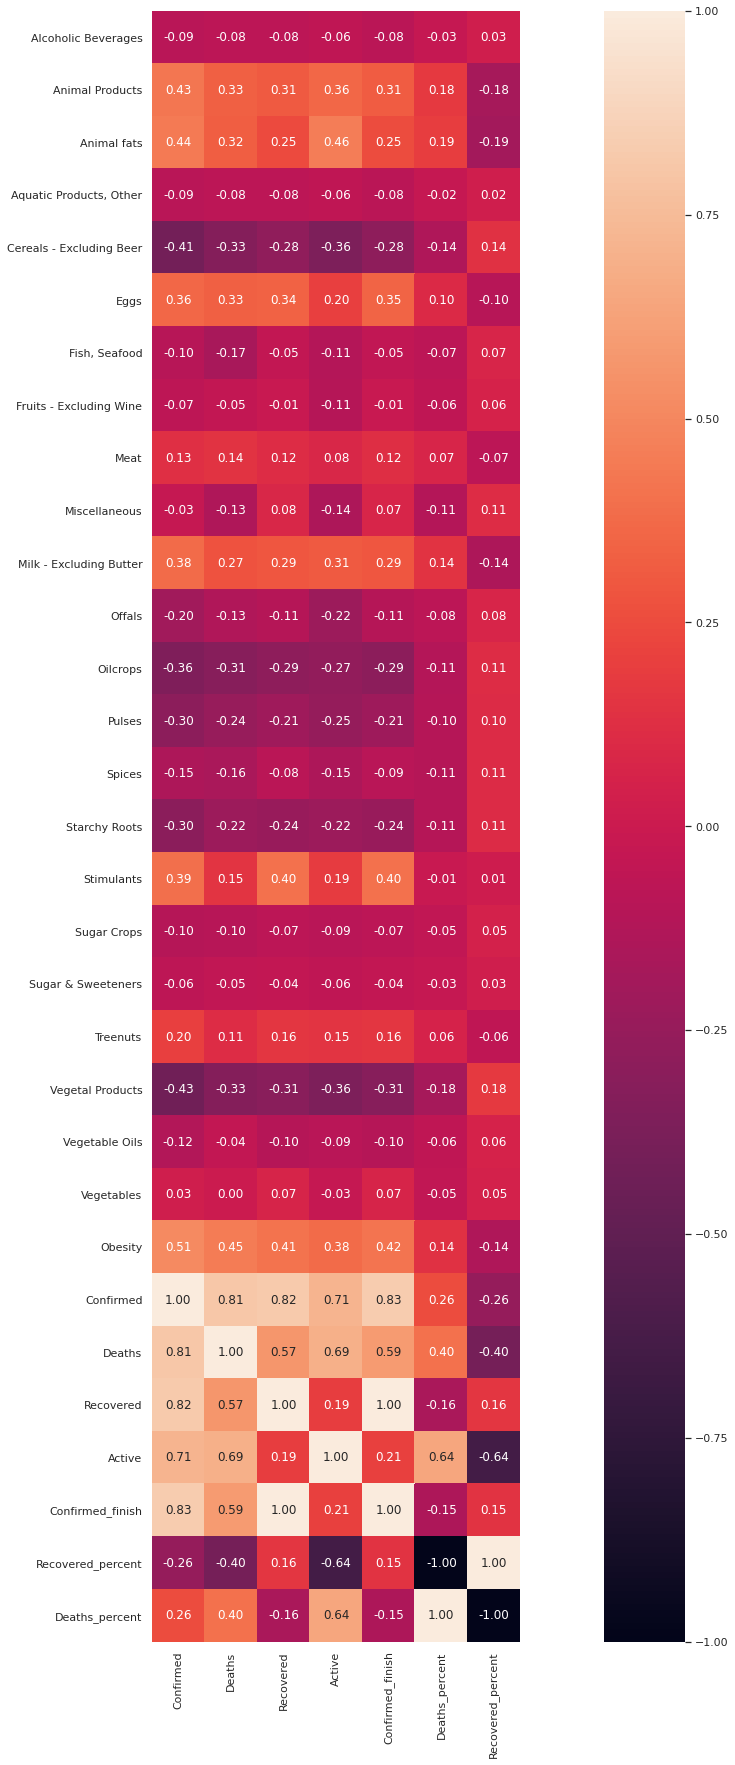

In [21]:
#Affichage
#plot correlation seaborn
from matplotlib import pyplot
import seaborn

a4_dims = (30, 30)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(matrix, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=frame.drop(columns=(['Population','Country'])).corr().columns, xticklabels=matrix.columns)



0.40053764933827873
[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132 154 106  47  45 115  40  86  46  63  37  68  60  78 153
 107  58 100   9 103 144  70 133 119  84  43  56  65   1  39  15  17  13
 140  42  71 126  72  90 157 135  67]


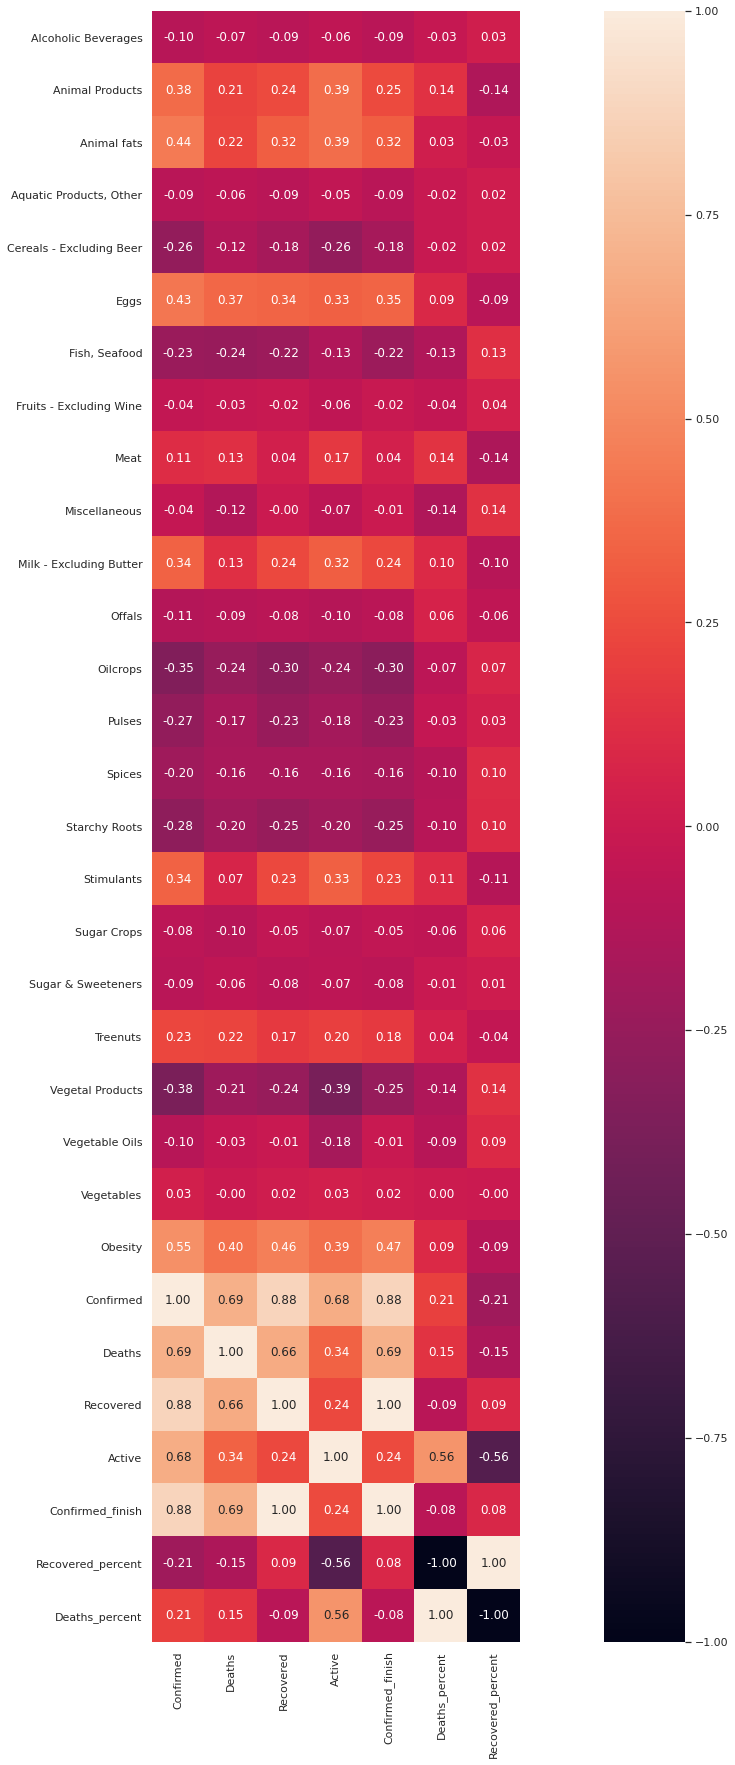

1.674014310529677
[ 77 158  21  66  87  97 137  23  10 145]


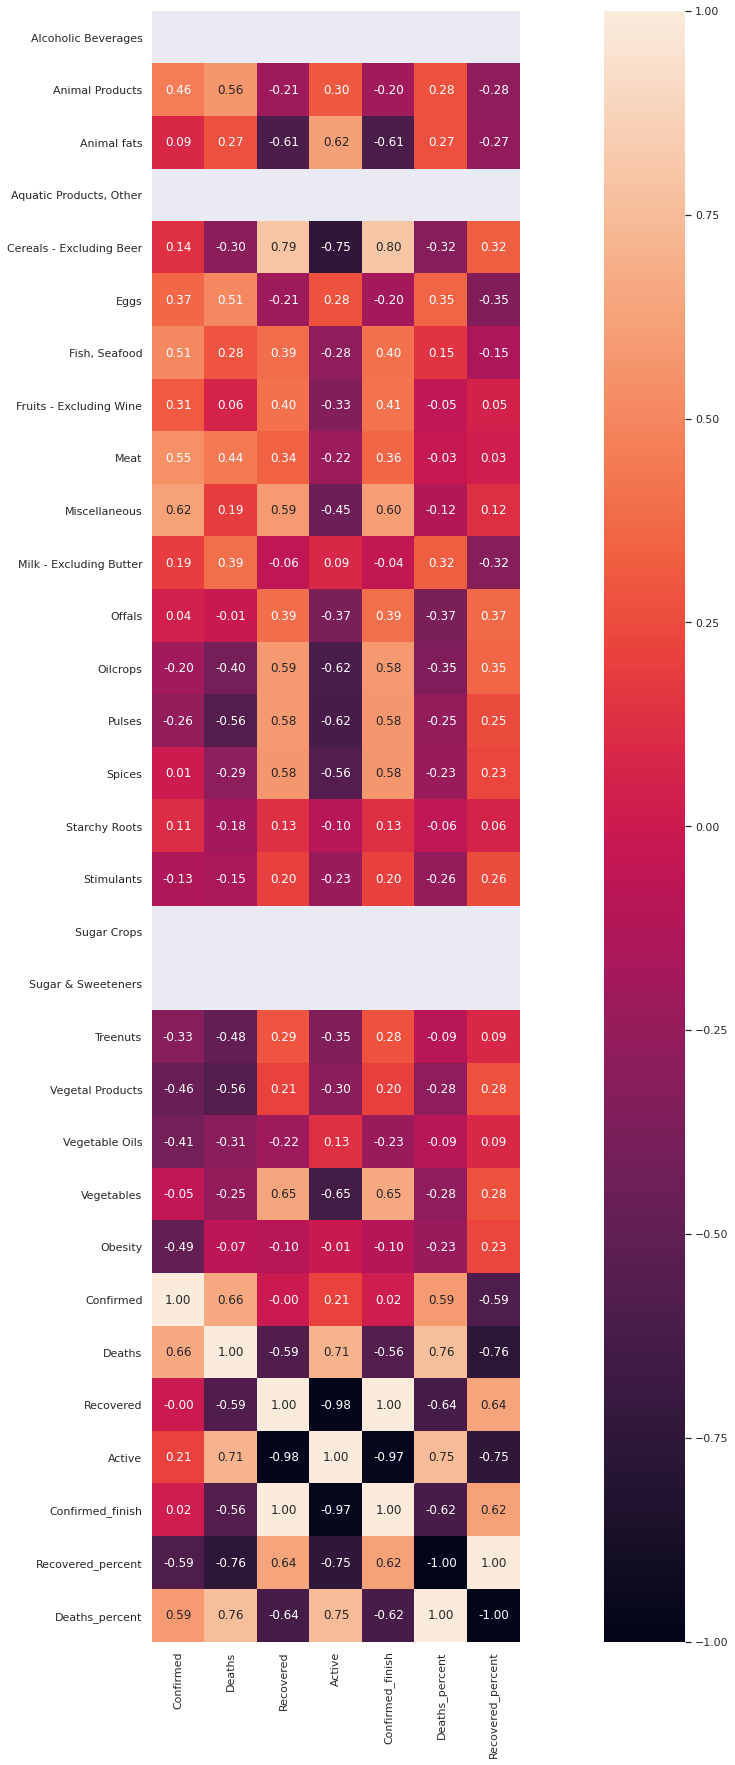

2.1755808136444674
[125 122  74 159  35  95 123  18]


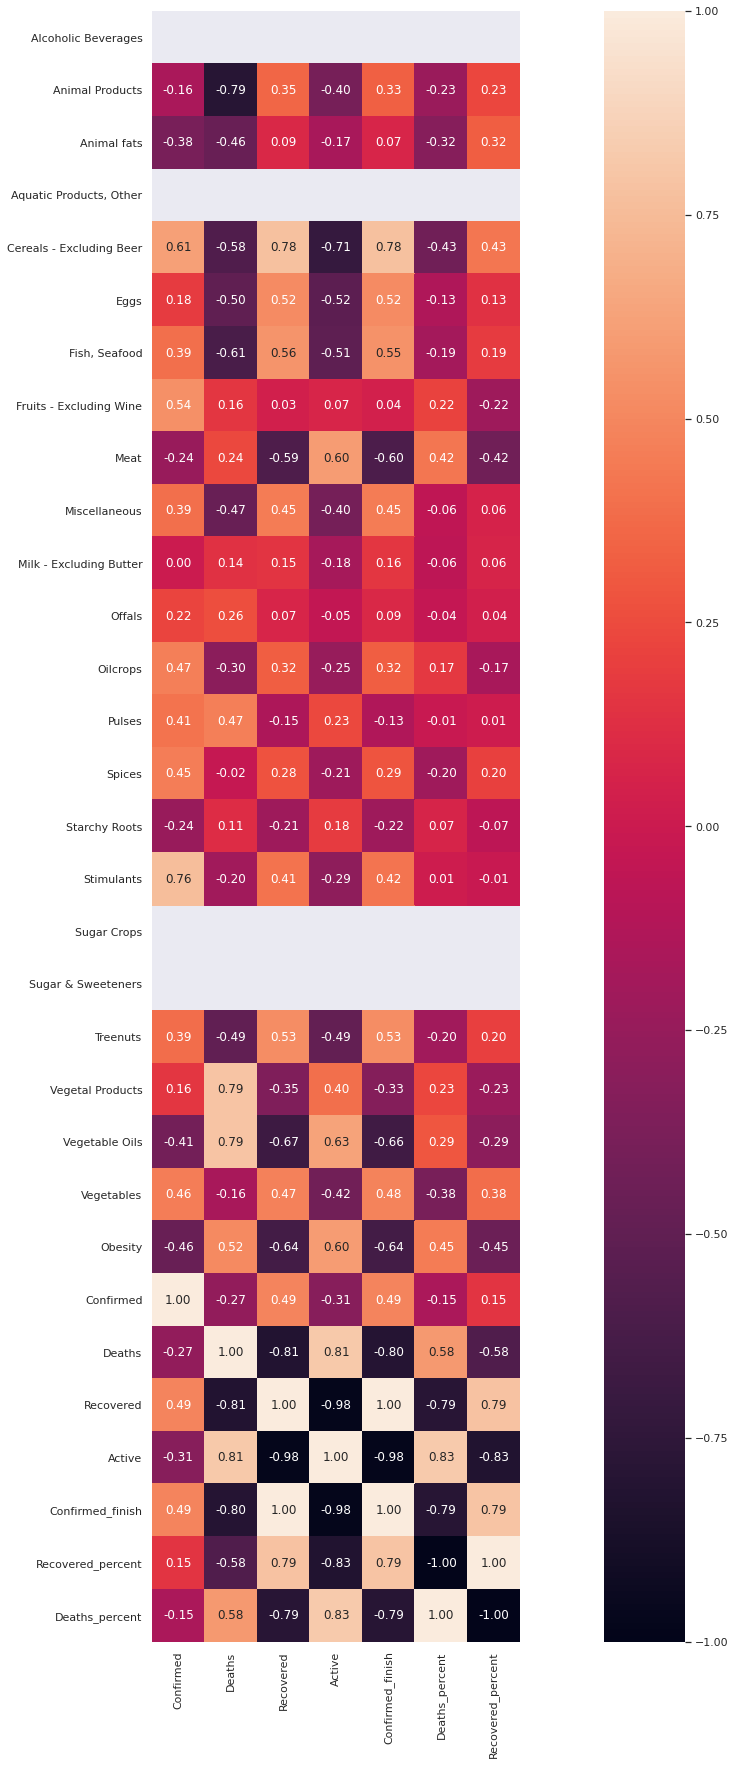

2.5729089386356727
[114  55  31  33   8 116 124 108 138  20]


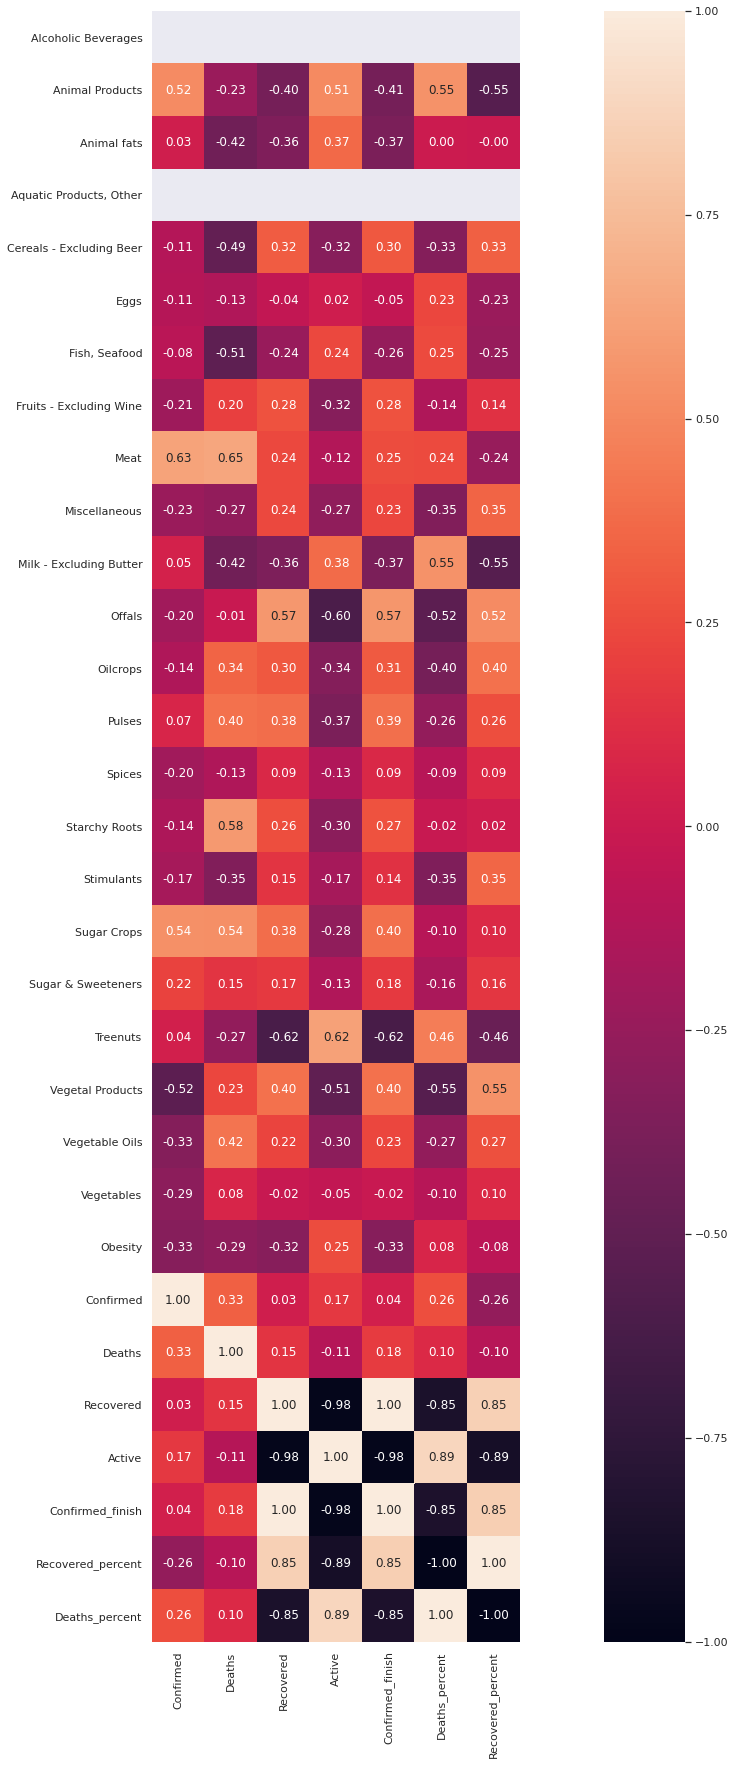

3.0791183691140103
[120  83   5 141 146  51]


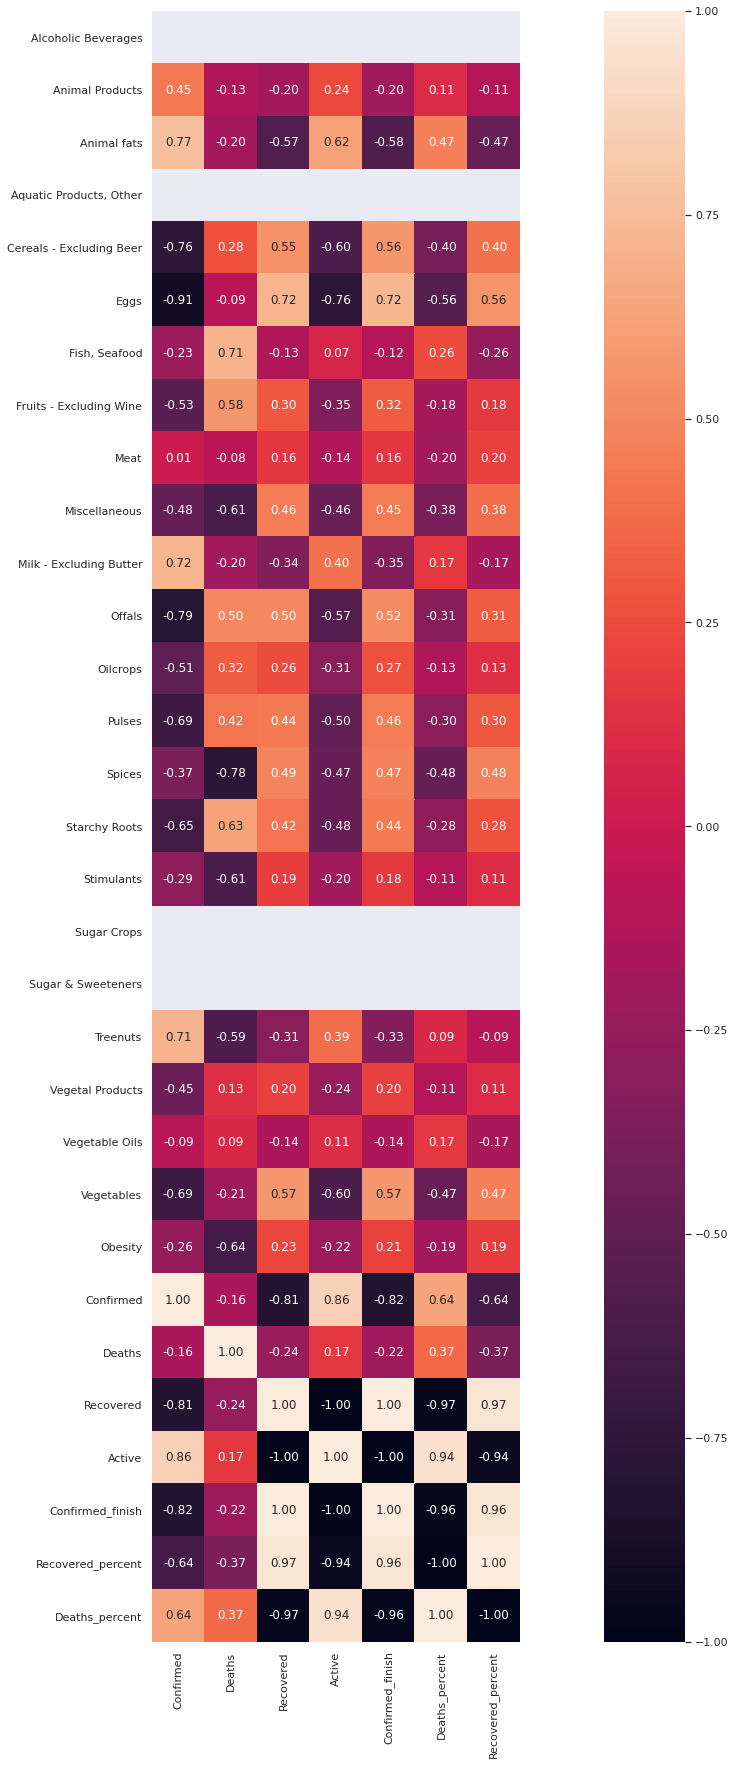

3.51123515506004
[161 118  73]


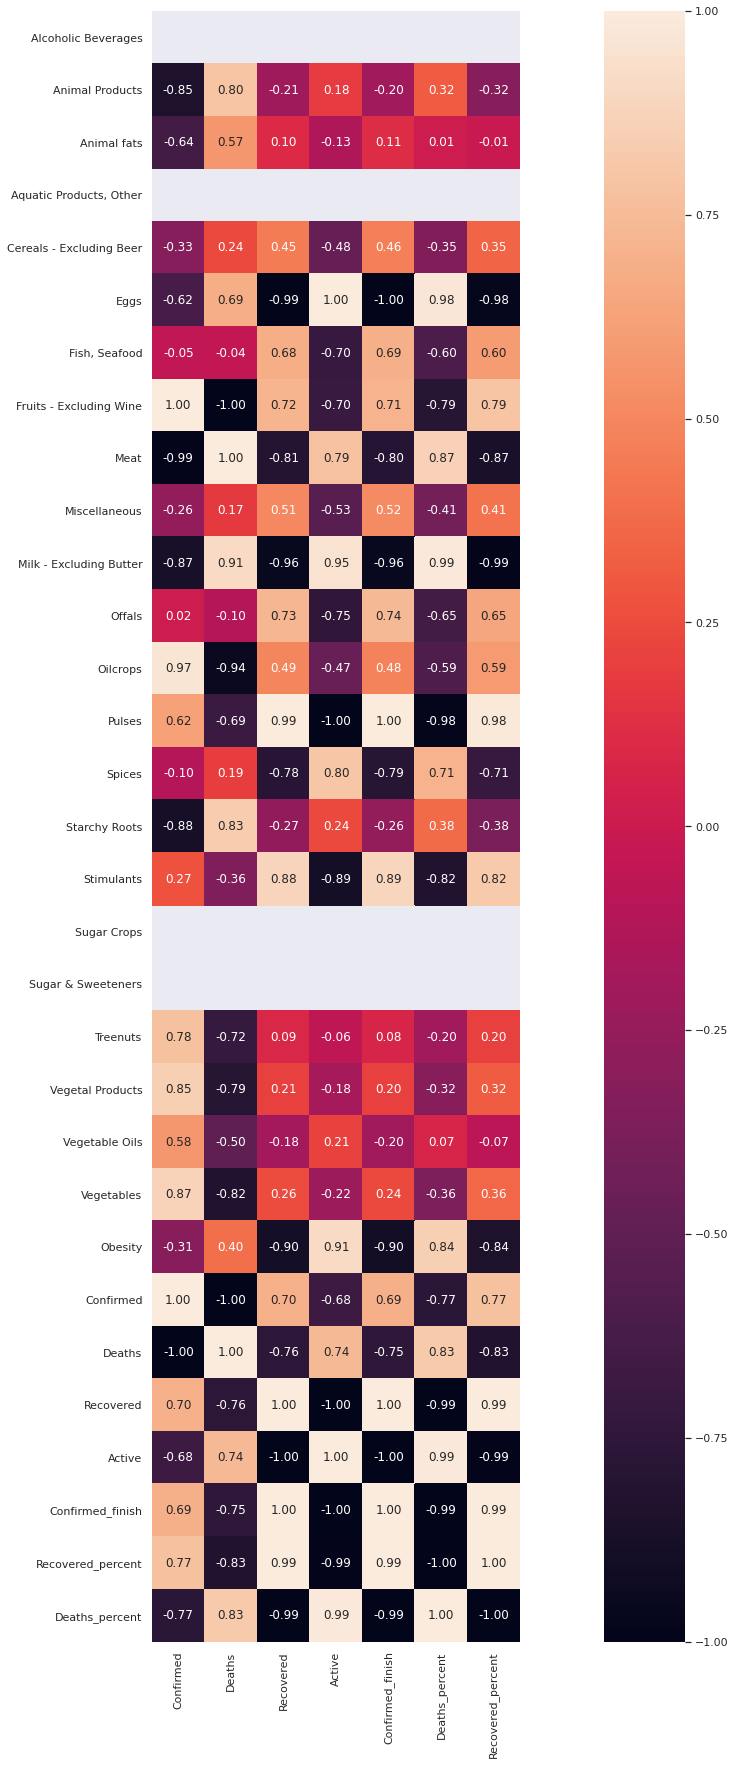

4.07506765899865
[6]


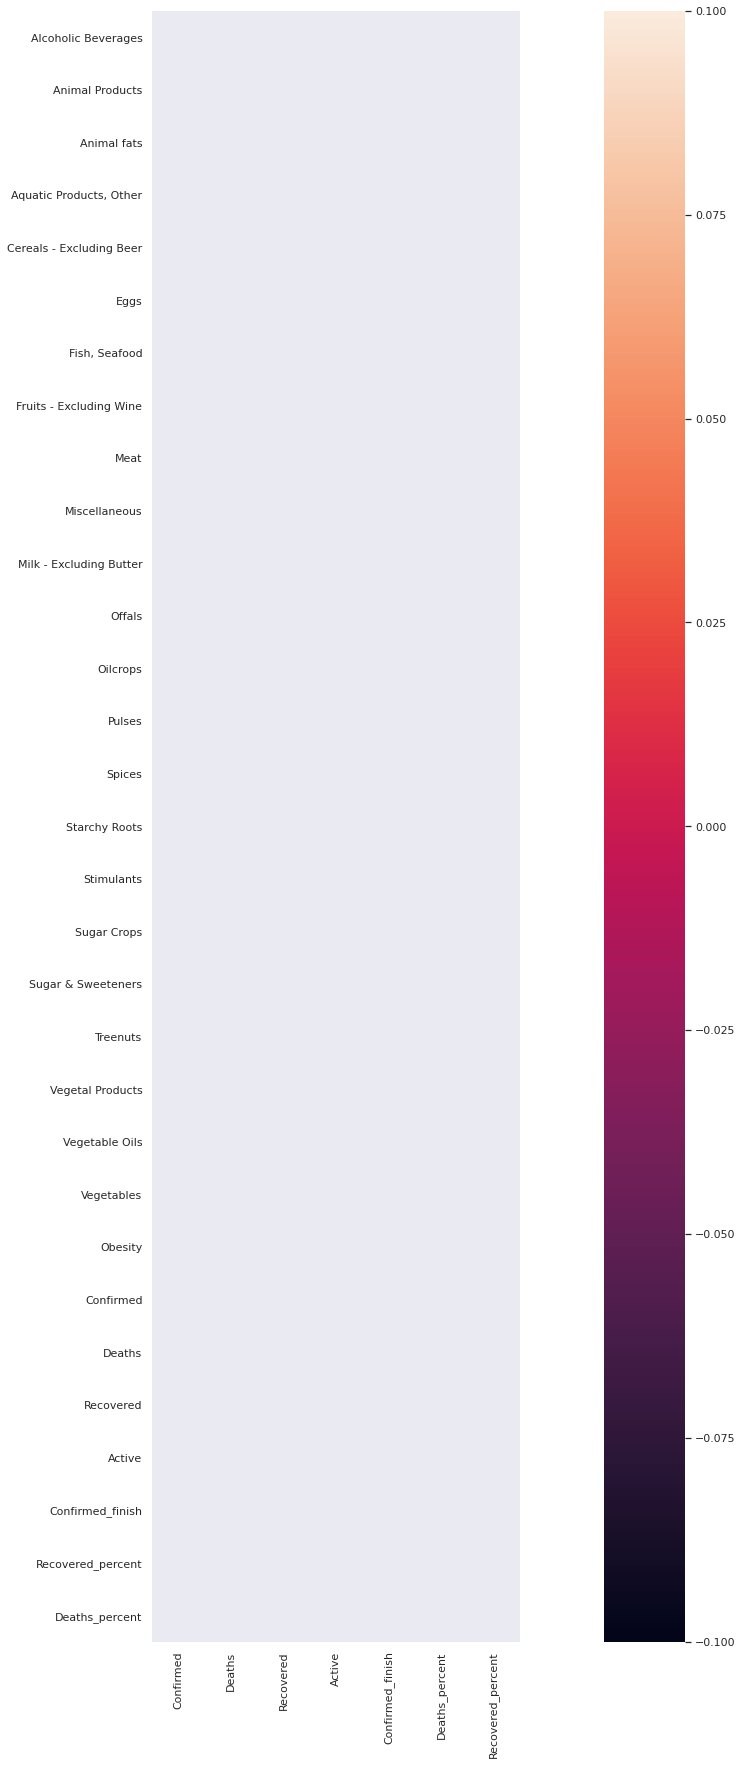

4.590868395039222
[ 38  91 102  14]


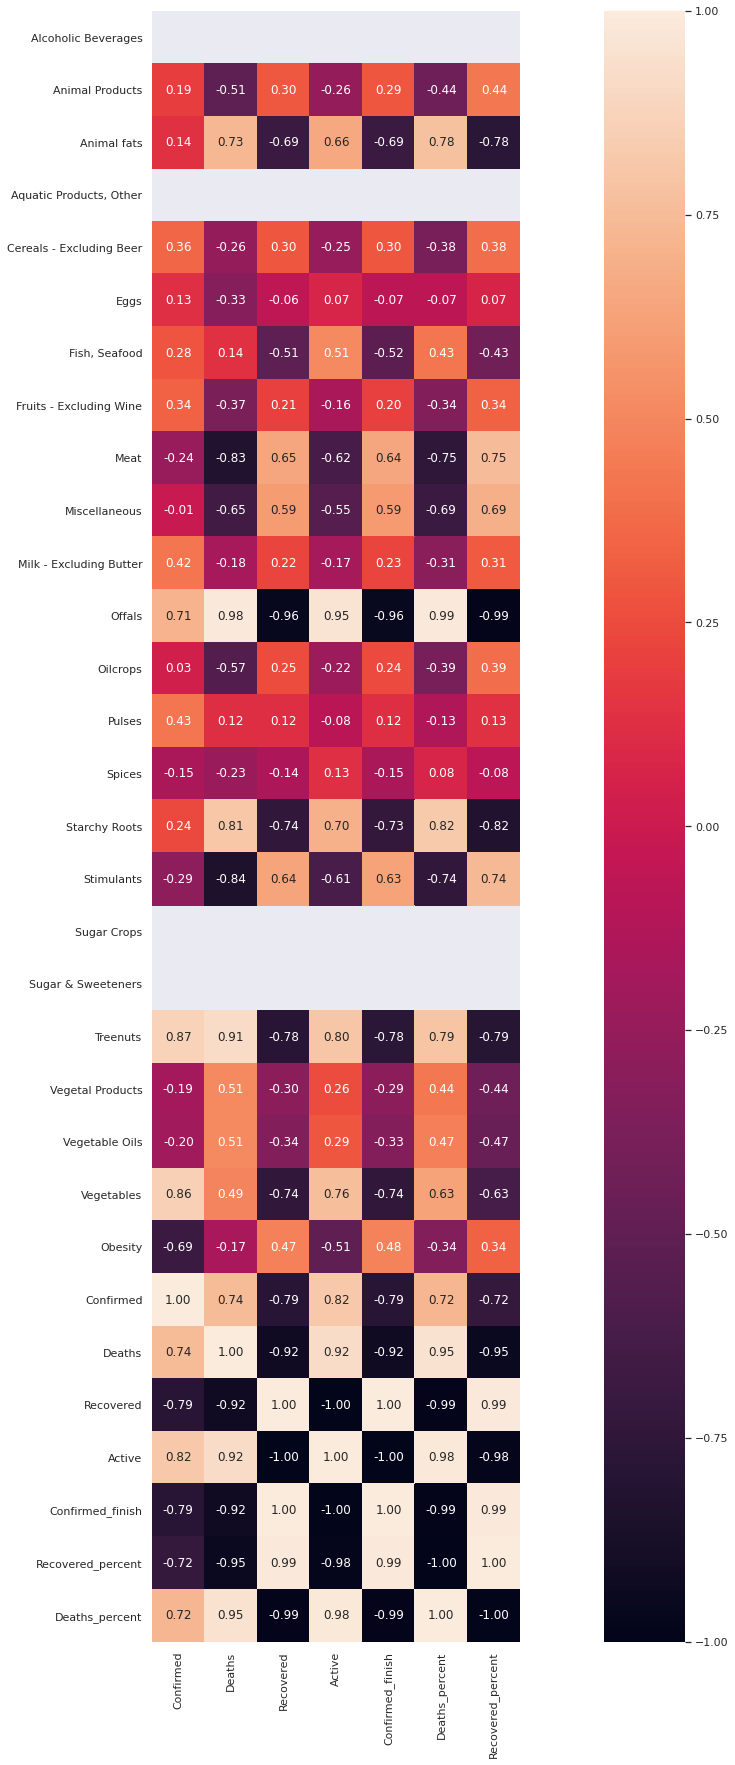

In [52]:
for ind in grouped_index:
    big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
    print(np.mean(frame.loc[ind]["Confirmed"]))
    print(ind)
    matrix = big_mat[data_covid]
    a4_dims = (30, 30)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(matrix, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=big_mat.columns, xticklabels=matrix.columns)
    plt.show()

In [22]:
frame_food = frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                                 "Vegetal Products", "Animal Products", "Spices",
                                 "Confirmed_finish", "Recovered", "Deaths_percent"])


In [23]:
frame_food

Alcoholic Beverages  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetable Oils  Vegetables  Obesity  Recovered_percent
0                 0.0000       6.2224                   0.0000                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960         0.0490      0.0980       0.0000              0.0000    0.7513         17.0831      0.3593      4.5          95.546833
1                 0.0000       3.4172                   0.0000                    2.6734  1.6448         0.1445                   0.6418   8.7428         0.0170                  17.7576  0.2933    3.1622  0.1148         0.0510      0.5270       0.0000              0.0000    0.9181          9.2443      0.6503     22.3          95.653344
2                 0.0000       0.8972                   0.0000                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698         0.1129      0.2886       0.0000              0.0000    0.8595         27.3606      0.5145     26.6          95.454545
3                 0.0000       1.3130                   0.0000                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282         0.7078      0.1128       0.0000              0.0000    0.0308         22.4638      0.1231      6.8          95.226456
4                 0.0000       4.6686                   0.0000                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673         0.0449      1.0549       0.0000              0.0000    0.2020         14.4436      0.2469     19.1          96.946565
5                 0.0000       3.3076                   0.0000                    1.3316  1.5706         0.1664                   0.2091  19.2693         0.0000                   5.8512  0.1878    0.0640  0.0213         0.1110      0.2475       0.0000              0.0000    0.1366         17.3147      0.1878     28.5          96.952854
6                 0.0000       6.2619                   0.0000                    2.5068  1.6196         0.2218                   0.5468  10.8165         0.0361                  10.4709  0.2734    0.6602  0.0774         0.0567      1.8002       0.0000              0.0000    0.9542         12.8127      0.8717     20.9          97.754798
7                 0.0000       4.6030                   0.0000                    0.9908  0.7017         0.4515                   0.4028  11.6002         0.0520                   6.5196  0.2339    1.2929  0.0260         0.0422      0.7926       0.0000              0.0000    1.6145         20.3612      0.2144     30.4          96.566215
8                 0.0000      12.8517                   0.0000                    1.2297  1.2147         0.4259                   0.2249   8.1099         0.0000                   5.1497  0.0750    1.1367  0.0120         0.0450      0.4439       0.0000              0.0000    0.8398         17.9323      0.2039     21.9          98.581413
9                 0.0000       7.7987                   0.0000                    5.4481  2.0197         0.2122                   0.5940  11.9993         0.0170                   9.9202  0.1612    0.1867  0.0255         0.1697      1.3663       0.0000              0.0000    2.2573          7.1538      0.6534     19.9          98.258399
10                0.0000       4.5600                   0.0000                    3.6327  1.2829         1.4991                   0.8995  17.4941         0.3556                   5.1318  0.2580    2.6077  0.0209         0.0349      0.9343       0.0000              0.0000    0.4532      

for i in frame_food.columns:
    print(i)
    frame_food[i].hist()
    plt.show()

In [24]:
#supprimer valeur abberante:
from scipy import stats
z_scores = stats.zscore(frame_food)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
frame_food = frame_food[filtered_entries]

for i in new_df.columns:
    print(i)
    new_df[i].hist()
    plt.show()

In [25]:
frame_food

Alcoholic Beverages  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetable Oils  Vegetables  Obesity  Recovered_percent
0                    0.0       6.2224                   0.0000                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960         0.0490      0.0980       0.0000              0.0000    0.7513         17.0831      0.3593      4.5          95.546833
2                    0.0       0.8972                   0.0000                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698         0.1129      0.2886       0.0000              0.0000    0.8595         27.3606      0.5145     26.6          95.454545
3                    0.0       1.3130                   0.0000                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282         0.7078      0.1128       0.0000              0.0000    0.0308         22.4638      0.1231      6.8          95.226456
4                    0.0       4.6686                   0.0000                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673         0.0449      1.0549       0.0000              0.0000    0.2020         14.4436      0.2469     19.1          96.946565
5                    0.0       3.3076                   0.0000                    1.3316  1.5706         0.1664                   0.2091  19.2693         0.0000                   5.8512  0.1878    0.0640  0.0213         0.1110      0.2475       0.0000              0.0000    0.1366         17.3147      0.1878     28.5          96.952854
6                    0.0       6.2619                   0.0000                    2.5068  1.6196         0.2218                   0.5468  10.8165         0.0361                  10.4709  0.2734    0.6602  0.0774         0.0567      1.8002       0.0000              0.0000    0.9542         12.8127      0.8717     20.9          97.754798
7                    0.0       4.6030                   0.0000                    0.9908  0.7017         0.4515                   0.4028  11.6002         0.0520                   6.5196  0.2339    1.2929  0.0260         0.0422      0.7926       0.0000              0.0000    1.6145         20.3612      0.2144     30.4          96.566215
8                    0.0      12.8517                   0.0000                    1.2297  1.2147         0.4259                   0.2249   8.1099         0.0000                   5.1497  0.0750    1.1367  0.0120         0.0450      0.4439       0.0000              0.0000    0.8398         17.9323      0.2039     21.9          98.581413
9                    0.0       7.7987                   0.0000                    5.4481  2.0197         0.2122                   0.5940  11.9993         0.0170                   9.9202  0.1612    0.1867  0.0255         0.1697      1.3663       0.0000              0.0000    2.2573          7.1538      0.6534     19.9          98.258399
11                   0.0       1.2369                   0.0000                    6.9946  1.2664         2.1646                   0.4270   1.8407         0.0147                   3.2249  0.1178    0.6332  0.5448         0.2209      0.0295       0.0147              0.0000    0.2651         29.6422      0.3092      3.4          98.262076
13                   0.0       7.8662                   0.0000                    4.8075  1.5772         0.5151                   0.2316  11.5636         0.0519                   2.0644  0.2316    0.4392  0.0000         0.1957      0.8385       0.0000              0.0000    1.0462      

In [118]:
correlation

Index(['Alcoholic Beverages', 'Animal fats', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous', 'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Obesity', 'Recovered_percent'], dtype='object')

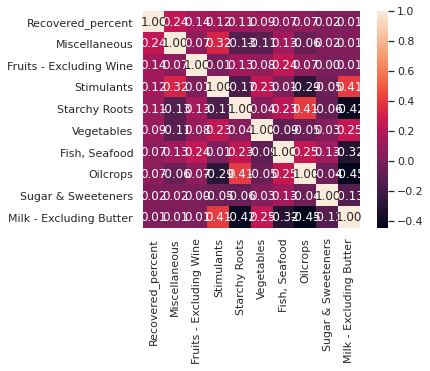

In [26]:
correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()


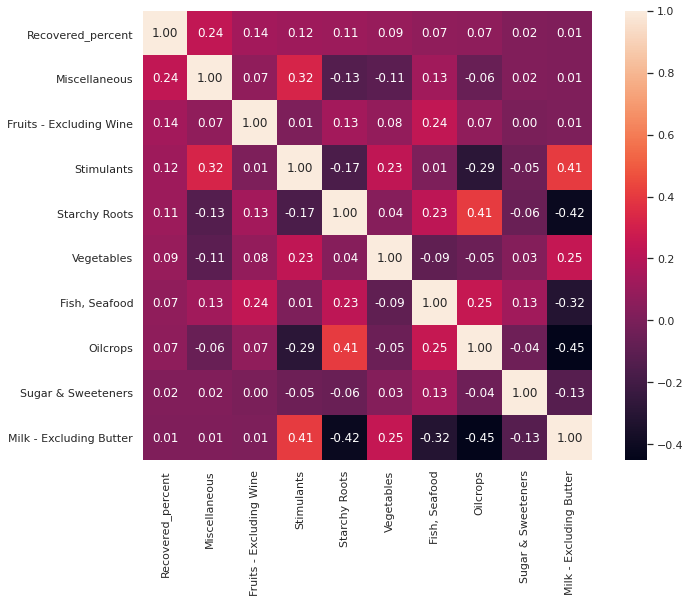

In [120]:
from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)


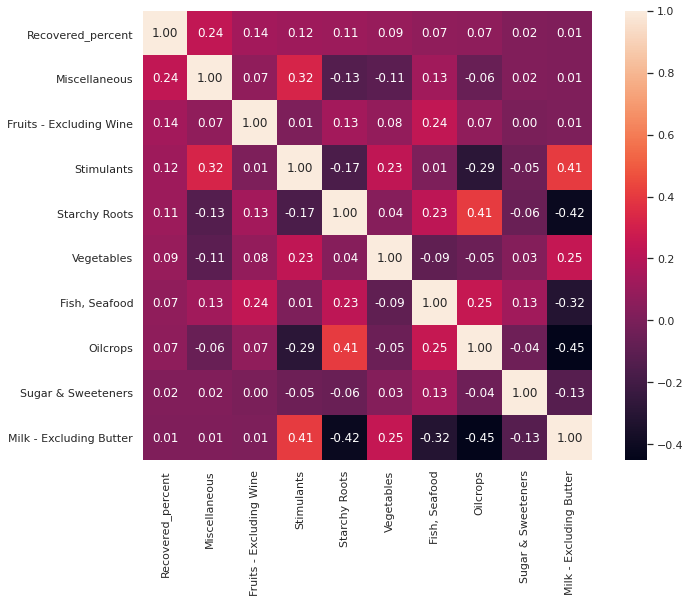

In [27]:
from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)


In [ ]:
from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)


In [54]:
frame_food[columns[0:7]]

KeyError: "['Recovered_percent'] not in index"

In [55]:
X = frame_food[columns[0:7]]
Y = X[name_y].values

a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

def denormalized(x):
    return (x / (b - a)) * (max_d - min_d) + min_d 



X = X.drop(name_y, axis = 1).values

Y = normalized_d
ind = Y != 0 

X = X[ind,]
Y = Y[ind]


a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

Y = normalized_d


X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)
normalized_d

KeyError: "['Recovered_percent'] not in index"

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut


pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('RandomForestRegressor', RandomForestRegressor())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    kfold = LeaveOneOut()
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


/home/brami/env2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledLR: -201.469445 (809.593562)


/home/brami/env2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledLASSO: -217.429882 (908.909288)


/home/brami/env2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledLASSO: -204.703073 (850.619315)


/home/brami/env2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledEN: -215.494376 (906.394975)


/home/brami/env2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledKNN: -236.875845 (654.111599)


/home/brami/env2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledCART: -355.552322 (1028.956471)


/home/brami/env2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(max_depth=np.array(list(range(1,10))))
#param_grid = dict(n_estimators=np.array(list(range(1,10))))
param_grid = dict(n_estimators=np.array(list(range(4,10))), max_depth=np.array(list(range(4,10))))
model = GradientBoostingRegressor(random_state=21)
#model = LinearRegression(random_state=21)
model = RandomForestRegressor()
#model = DecisionTreeRegressor()

kfold = KFold(n_splits=6, random_state=21)
kfold = LeaveOneOut()

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X, Y)
#grid_result = grid.fit(X_train, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [ ]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
#model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model = LinearRegression()
model = RandomForestRegressor(n_estimators=9, max_depth=8)

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.001)
#model = LinearRegression()

model.fit(X_train, Y_train)



# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
#predictions = model.predict(rescaled_X_test)
predictions = model.predict(X_test)
print (mean_squared_error(Y_test, predictions))
print (mean_squared_error(Y_train, model.predict(X_train)))


In [ ]:
g=plt.scatter(Y_test, predictions)
#g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')



In [ ]:
denormalized(Y_train), denormalized(model.predict(X_train))

In [26]:
for i, res in zip(model.predict(X_train), Y_train):
    print(i, res)

NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
Y_test

In [ ]:
Y.shape

# Arbre

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeRegressor(max_depth=4)
# Train Decision Tree Classifer

X = frame_food[columns[0:7]]
Y = X[name_y]
X = X.drop(name_y, axis = 1)


clf = clf.fit(X, Y)

#Predict the response for test dataset





from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeRegressor(max_depth=4)
x = frame.drop(columns=[name_y])
y = frame[name_y]
# Train Decision Tree Classifer
clf = clf.fit(x, y)

#Predict the response for test dataset





from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


# Meilleur regression avec groupby

[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132 154 106  47  45 115  40  86  46  63  37  68  60  78 153
 107  58 100   9 103 144  70 133 119  84  43  56  65   1  39  15  17  13
 140  42  71 126  72  90 157 135  67]
0.40053764933827873
117
[1.         0.13788528 0.13083923 0.10182287 0.0995263  0.09440273
 0.07453106 0.0568319  0.04343331 0.03190458]


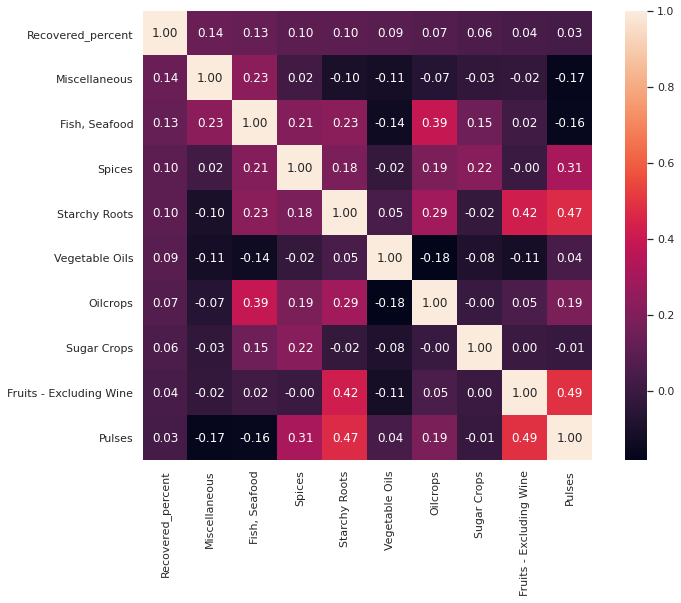

Index(['Recovered_percent', 'Miscellaneous', 'Fish, Seafood', 'Spices', 'Starchy Roots', 'Vegetable Oils', 'Oilcrops', 'Sugar Crops', 'Fruits - Excluding Wine', 'Pulses'], dtype='object')
Index(['Recovered_percent', 'Miscellaneous', 'Fish, Seafood', 'Spices', 'Starchy Roots', 'Vegetable Oils', 'Oilcrops', 'Sugar Crops', 'Fruits - Excluding Wine', 'Pulses'], dtype='object')
ScaledLR: -118.878901 (703.121182)
pred =  102.8631682052223 Y =  99.99999999999939
denormalized pred =  100.85866753980729 denormalized Y =  99.99999999999982

pred =  85.63102940255024 Y =  65.67496850469924
denormalized pred =  95.69072867951974 denormalized Y =  89.70588235294088

pred =  91.00133088005995 Y =  89.93053433269841
denormalized pred =  97.30128846057133 denormalized Y =  96.98015530629837

pred =  96.17012159178674 Y =  99.9999999999982
denormalized pred =  98.85141492401904 denormalized Y =  99.99999999999946

pred =  98.27997582143216 Y =  99.99999999999896
denormalized pred =  99.48416270929314 d

denormalized pred =  95.98726956659178 denormalized Y =  96.6649457924624

pred =  87.39909738004202 Y =  87.60902873435418
denormalized pred =  96.22097436249283 denormalized Y =  96.2839330245815

pred =  91.14215949837573 Y =  98.31899998438712
denormalized pred =  97.34352313019468 denormalized Y =  99.49586610203704



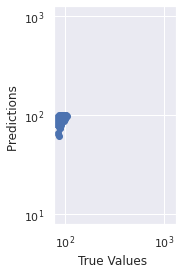

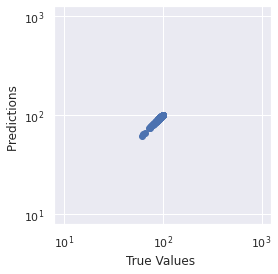

ScaledLASSO: -127.395204 (757.165443)
pred =  91.11408329286553 Y =  99.99999999999939
denormalized pred =  97.33510304287023 denormalized Y =  99.99999999999982

pred =  90.12888440936331 Y =  65.67496850469924
denormalized pred =  97.0396407294879 denormalized Y =  89.70588235294088

pred =  90.65957744136429 Y =  89.93053433269841
denormalized pred =  97.19879619906527 denormalized Y =  96.98015530629837

pred =  93.62658359833677 Y =  99.9999999999982
denormalized pred =  98.08860486373044 denormalized Y =  99.99999999999946

pred =  91.95234186508141 Y =  99.99999999999896
denormalized pred =  97.58649778266027 denormalized Y =  99.99999999999969

pred =  89.98012912966502 Y =  99.99999999999943
denormalized pred =  96.99502884471671 denormalized Y =  99.99999999999983

pred =  90.98211683480349 Y =  80.38569628839954
denormalized pred =  97.29552614561547 denormalized Y =  94.11764705882335

pred =  90.29065707932351 Y =  80.88368434332155
denormalized pred =  97.08815654503425 d

denormalized pred =  96.8140176397465 denormalized Y =  96.2839330245815

pred =  90.81365222222166 Y =  98.31899998438712
denormalized pred =  97.24500340854176 denormalized Y =  99.49586610203704



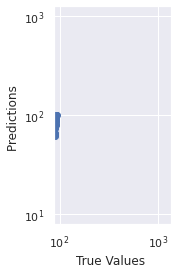

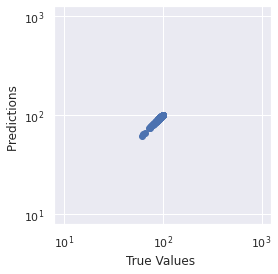

ScaledLASSO: -119.197056 (714.789625)
pred =  96.4163342992044 Y =  99.99999999999939
denormalized pred =  98.92525440692543 denormalized Y =  99.99999999999982

pred =  86.0897715149235 Y =  65.67496850469924
denormalized pred =  95.82830598298347 denormalized Y =  89.70588235294088

pred =  91.90945171507141 Y =  89.93053433269841
denormalized pred =  97.57363497581439 denormalized Y =  96.98015530629837

pred =  95.41564940055228 Y =  99.9999999999982
denormalized pred =  98.62514781923677 denormalized Y =  99.99999999999946

pred =  95.84803101170905 Y =  99.99999999999896
denormalized pred =  98.75481957712816 denormalized Y =  99.99999999999969

pred =  90.6551045411805 Y =  99.99999999999943
denormalized pred =  97.19745477099632 denormalized Y =  99.99999999999983

pred =  89.25120486285977 Y =  80.38569628839954
denormalized pred =  96.77642359276474 denormalized Y =  94.11764705882335

pred =  80.39142778084782 Y =  80.88368434332155
denormalized pred =  94.11936594020483 den

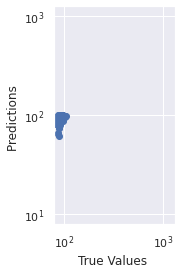

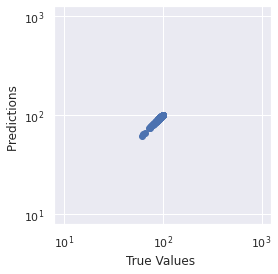

ScaledEN: -126.285821 (753.846952)
pred =  91.42612775050713 Y =  99.99999999999939
denormalized pred =  97.42868554573013 denormalized Y =  99.99999999999982

pred =  90.11342723703943 Y =  65.67496850469924
denormalized pred =  97.0350051051793 denormalized Y =  89.70588235294088

pred =  90.79640686296143 Y =  89.93053433269841
denormalized pred =  97.23983150485057 denormalized Y =  96.98015530629837

pred =  93.76366202733082 Y =  99.9999999999982
denormalized pred =  98.12971484712935 denormalized Y =  99.99999999999946

pred =  91.84049227253301 Y =  99.99999999999896
denormalized pred =  97.55295395722703 denormalized Y =  99.99999999999969

pred =  90.10961347950001 Y =  99.99999999999943
denormalized pred =  97.03386135477099 denormalized Y =  99.99999999999983

pred =  90.79299265286397 Y =  80.38569628839954
denormalized pred =  97.23880757919387 denormalized Y =  94.11764705882335

pred =  90.48134935019203 Y =  80.88368434332155
denormalized pred =  97.14534538318505 deno

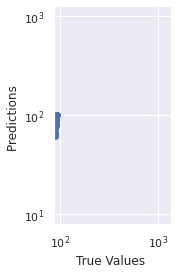

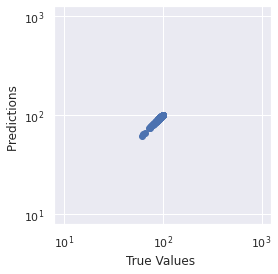

ScaledKNN: -147.176269 (732.349255)
pred =  91.53378113190597 Y =  99.99999999999939
denormalized pred =  97.46097092246389 denormalized Y =  99.99999999999982

pred =  93.00838421782342 Y =  65.67496850469924
denormalized pred =  97.90320613647174 denormalized Y =  89.70588235294088

pred =  92.41817133575412 Y =  89.93053433269841
denormalized pred =  97.72620059328199 denormalized Y =  96.98015530629837

pred =  95.22654920929627 Y =  99.9999999999982
denormalized pred =  98.56843644764962 denormalized Y =  99.99999999999946

pred =  86.99721661083743 Y =  99.99999999999896
denormalized pred =  96.1004498432699 denormalized Y =  99.99999999999969

pred =  91.45997104208882 Y =  99.99999999999943
denormalized pred =  97.43883518900587 denormalized Y =  99.99999999999983

pred =  93.82295155417779 Y =  80.38569628839954
denormalized pred =  98.14749584653454 denormalized Y =  94.11764705882335

pred =  91.53140027364499 Y =  80.88368434332155
denormalized pred =  97.46025690024825 den

denormalized pred =  96.90200472345127 denormalized Y =  95.81866052328436

pred =  90.28715309232892 Y =  97.71893488695636
denormalized pred =  97.08710569517966 denormalized Y =  99.31590586777791

pred =  91.7276805422882 Y =  82.37111919919387
denormalized pred =  97.51912158555776 denormalized Y =  94.71307774402699

pred =  86.96620512881833 Y =  61.48010495380045
denormalized pred =  96.09114946303987 denormalized Y =  88.44783779987982

pred =  96.00535704996874 Y =  94.19275193199078
denormalized pred =  98.80200184255484 denormalized Y =  98.25839941833912

pred =  70.04254193561744 Y =  93.53024966091859
denormalized pred =  91.01572280381407 denormalized Y =  98.05971420166875

pred =  88.69976900419638 Y =  92.6660206827308
denormalized pred =  96.61104732487509 denormalized Y =  97.8005309063328

pred =  90.81852955677238 Y =  76.90300284138503
denormalized pred =  97.24646612695692 denormalized Y =  93.07318316438767

pred =  73.95891400474252 Y =  94.51663773839803
den

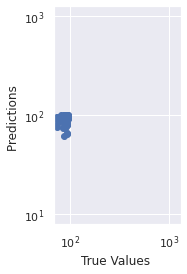

KeyboardInterrupt: 

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")
cpt = 0
for ind in grouped_index:
    cpt += 1
    big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
    print(ind)
    print(np.mean(frame.loc[ind]["Confirmed"]))
    print(len(frame.loc[ind]["Confirmed"]))
    
    current_frame = frame.loc[ind]
    frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                                 "Vegetal Products", "Animal Products", "Obesity",
                                 "Confirmed_finish", "Recovered", "Deaths_percent"])

    a4_dims = (11.7, 8.27)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    correlation = frame_food.corr(method='pearson')
    columns = correlation.nlargest(10, name_y).index

    correlation_map = np.corrcoef(frame_food[columns].values.T)
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
    print(correlation_map[0])
    plt.show(ax)

    
    
    X = frame_food[columns[0:]]
    Y = X[name_y].values

    a = 0
    b = 100
    print(columns)
    d = Y
    min_d = np.min(d)
    max_d = np.max(d)
    normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

    def denormalized(x):
        return (x / (b - a)) * (max_d - min_d) + min_d 



    X = X.drop(name_y, axis = 1).values

    Y = normalized_d
    ind = Y != 0 

    X = X[ind,]
    Y = Y[ind]


    a = 0
    b = 100
    print(columns)
    d = Y
    min_d = np.min(d)
    max_d = np.max(d)
    normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

    Y = normalized_d




    pipelines = []
    pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
    pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
    pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Ridge())])))
    pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
    pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
    pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
    pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))
    pipelines.append(('ScaledGBM', Pipeline([('RandomForestRegressor', RandomForestRegressor())])))


    results = []
    names = []
    for name, model in pipelines:
        kfold = KFold(n_splits=10, random_state=21)
        kfold = LeaveOneOut()
        try:
            cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
        except Exception as e:
            try :
                print("excemt",e, len(X))
                kfold = KFold(n_splits=int(len(X)/2), random_state=21)
                cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
            except Exception as e2:
                print("excemt",e2, len(X))
                model.fit(X_train, Y_train)
                class tmp(): 
                    content = {}
                cv_results = tmp()
                cv_results.mean = lambda : mean_squared_error(model.predict(X_train), Y_train)
                cv_results.std = lambda : -1

            
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        pred = []
        for ind in range(len(X)):
            dataX = np.delete(X, ind, axis=0)
            dataY = np.delete(Y, ind, axis=0)
            try:
                model.fit(dataX, dataY)
                pred.append(model.predict(X[ind].reshape(1, -1))[0])
            except:
                pred = [-1 for i in Y]
        for ind in range(len(pred)):
            print("pred = ", pred[ind], "Y = ", Y[ind])
            print("denormalized pred = ", denormalized(pred[ind]), "denormalized Y = ", denormalized(Y[ind]))
            print()

        g=plt.scatter(pred, Y)
        #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

        g.axes.set_yscale('log')
        g.axes.set_xscale('log')
        g.axes.set_xlabel('True Values ')
        g.axes.set_ylabel('Predictions ')
        g.axes.axis('equal')
        g.axes.axis('square')
        plt.show(g)
            
        g=plt.scatter(Y, Y)
        #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

        g.axes.set_yscale('log')
        g.axes.set_xscale('log')
        g.axes.set_xlabel('True Values ')
        g.axes.set_ylabel('Predictions ')
        g.axes.axis('equal')
        g.axes.axis('square')
        plt.show(g)
        





[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132 154 106  47  45 115  40  86  46  63  37  68  60  78 153
 107  58 100   9 103 144  70 133 119  84  43  56  65   1  39  15  17  13
 140  42  71 126  72  90 157 135  67]
0.40053764933827873
117
[1.         0.13788528 0.13083923 0.10182287 0.0995263  0.09440273
 0.07453106 0.0568319  0.04343331 0.03190458]


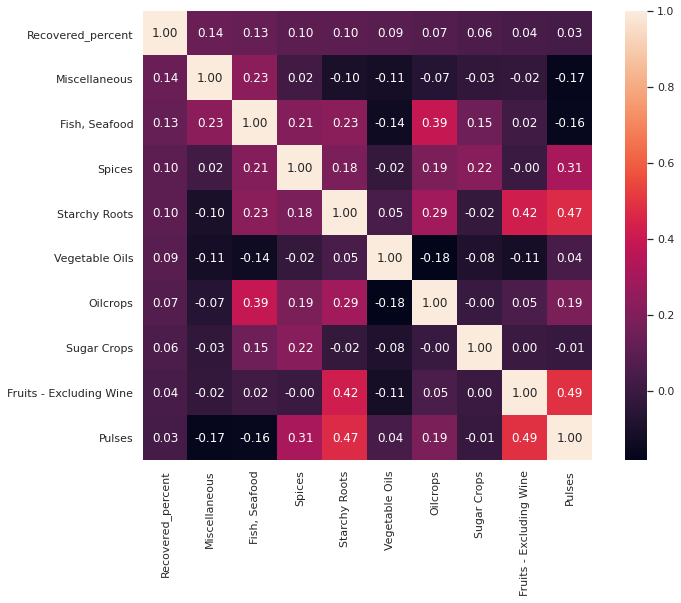

[ 77 158  21  66  87  97 137  23  10 145]
1.674014310529677
10
[1.         0.37274519 0.35270524 0.32325197 0.27873454 0.25634262
 0.25097716 0.22976562 0.12490945 0.09182076]


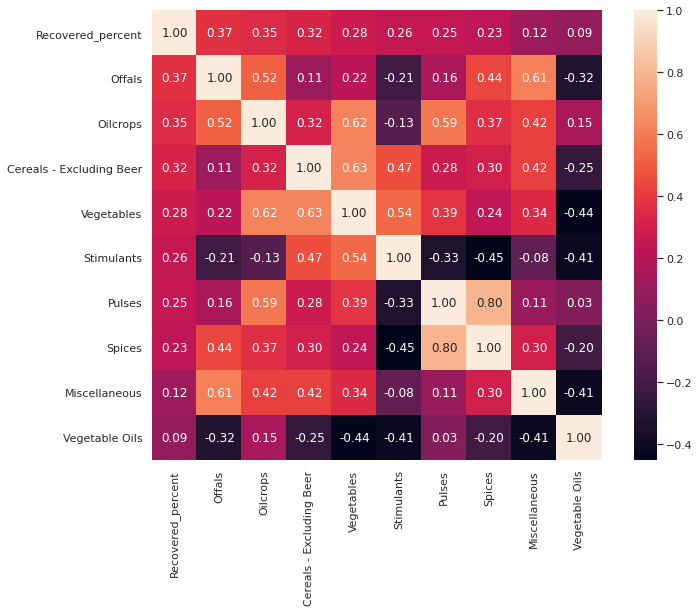

[125 122  74 159  35  95 123  18]
2.1755808136444674
8
[1.         0.4275583  0.38468494 0.32407918 0.20449766 0.19603681
 0.18545778 0.13453893 0.06497269 0.0591353 ]


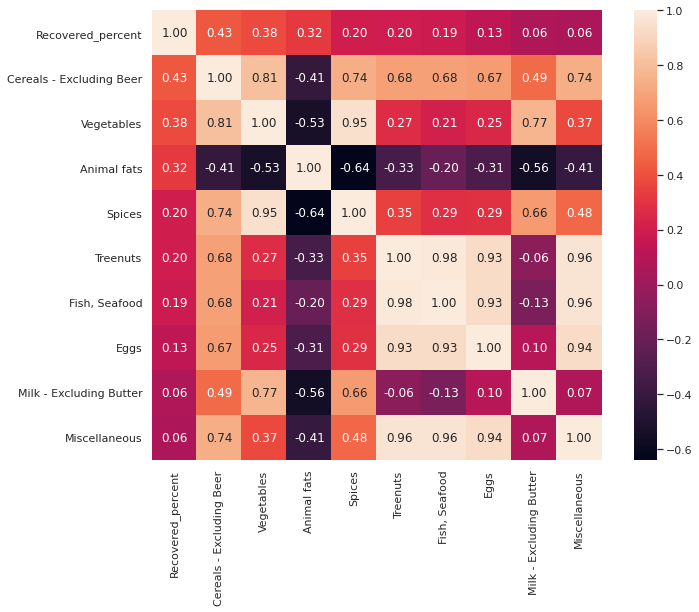

[114  55  31  33   8 116 124 108 138  20]
2.5729089386356727
10
[1.         0.51933652 0.40141297 0.35170901 0.34697493 0.3344612
 0.27215726 0.26130806 0.16279745 0.13961024]


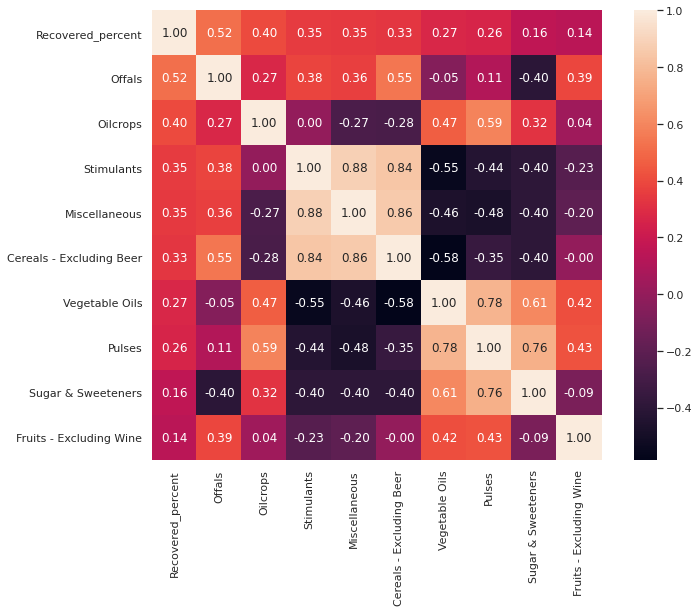

[120  83   5 141 146  51]
3.0791183691140103
6
[1.         0.55959409 0.47563928 0.46840344 0.4011277  0.3848447
 0.31329537 0.302944   0.2786672  0.19877463]


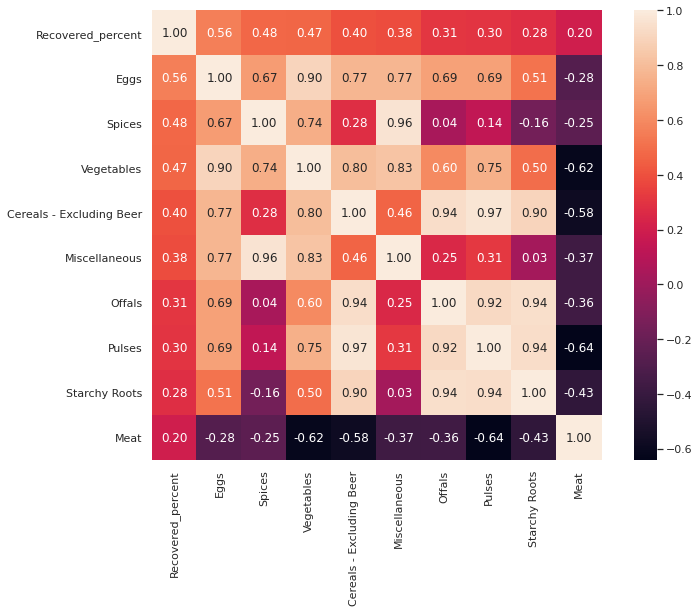

[161 118  73]
3.51123515506004
3
[1.         0.97781514 0.8214855  0.79037381 0.64552247 0.59611273
 0.586202   0.40989643 0.35947658 0.34763229]


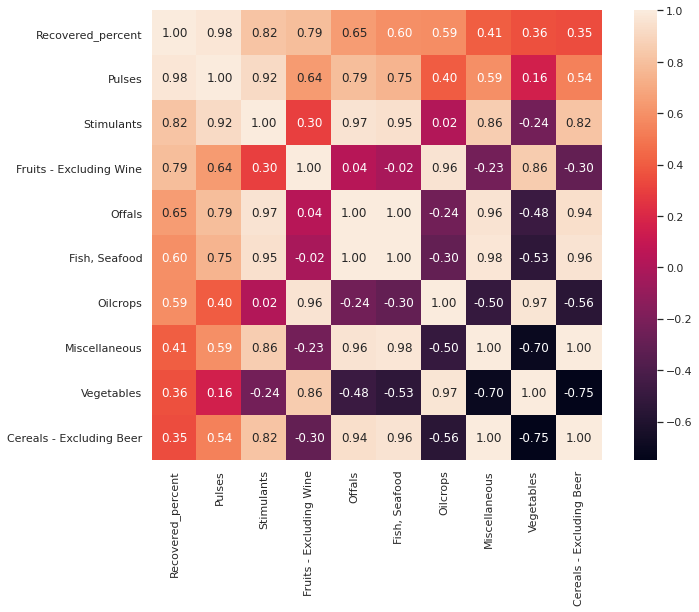

[6]
4.07506765899865
1


ValueError: zero-size array to reduction operation fmin which has no identity

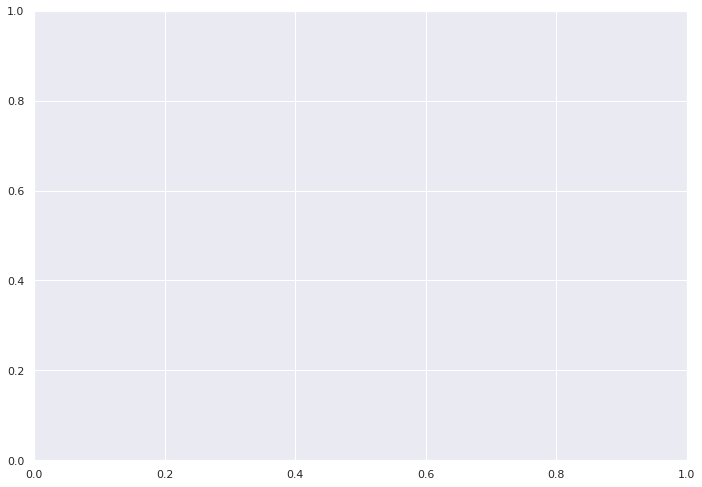

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")
cpt = 0
for ind in grouped_index:
    cpt += 1
    big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
    print(ind)
    print(np.mean(frame.loc[ind]["Confirmed"]))
    print(len(frame.loc[ind]["Confirmed"]))
    
    current_frame = frame.loc[ind]
    frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                                 "Vegetal Products", "Animal Products", "Obesity",
                                 "Confirmed_finish", "Recovered", "Deaths_percent"])

    a4_dims = (11.7, 8.27)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    correlation = frame_food.corr(method='pearson')
    columns = correlation.nlargest(10, name_y).index

    correlation_map = np.corrcoef(frame_food[columns].values.T)
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
    print(correlation_map[0])
    plt.show(ax)


In [ ]:
# en gardant les valeur au dessus 1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")
cpt = 0

cpt += 1
ind = np.concatenate(grouped_index[1:])
big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
print(ind)
print(np.mean(frame.loc[ind]["Confirmed"]))
print(len(frame.loc[ind]["Confirmed"]))

current_frame = frame.loc[ind]
frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                             "Vegetal Products", "Animal Products", "Obesity",
                             "Confirmed_finish", "Recovered", "Deaths_percent"])

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index
correlation_map = np.corrcoef(frame_food[columns].values.T)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
print(correlation_map[0])
plt.show(ax)



X = frame_food[columns[0:]]
Y = X[name_y].values

a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

def denormalized(x):
    return (x / (b - a)) * (max_d - min_d) + min_d 



X = X.drop(name_y, axis = 1).values

Y = normalized_d
ind = Y != 0 

X = X[ind,]
Y = Y[ind]


a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

Y = normalized_d




pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('RandomForestRegressor', RandomForestRegressor())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    kfold = LeaveOneOut()
    try:
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    except Exception as e:
        try :
            print("excemt",e, len(X))
            kfold = KFold(n_splits=int(len(X)/2), random_state=21)
            cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
        except Exception as e2:
            print("excemt",e2, len(X))
            model.fit(X_train, Y_train)
            class tmp(): 
                content = {}
            cv_results = tmp()
            cv_results.mean = lambda : mean_squared_error(model.predict(X_train), Y_train)
            cv_results.std = lambda : -1


    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    pred = []
    for ind in range(len(X)):
        dataX = np.delete(X, ind, axis=0)
        dataY = np.delete(Y, ind, axis=0)
        try:
            model.fit(dataX, dataY)
            pred.append(model.predict(X[ind].reshape(1, -1))[0])
        except:
            pred = [-1 for i in Y]
    for ind in range(len(pred)):
        print("pred = ", pred[ind], "Y = ", Y[ind])
        print("denormalized pred = ", denormalized(pred[ind]), "denormalized Y = ", denormalized(Y[ind]))
        print()

    g=plt.scatter(pred, Y)
    #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

    g.axes.set_yscale('log')
    g.axes.set_xscale('log')
    g.axes.set_xlabel('True Values ')
    g.axes.set_ylabel('Predictions ')
    g.axes.axis('equal')
    g.axes.axis('square')
    plt.show(g)

    g=plt.scatter(Y, Y)
    #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

    g.axes.set_yscale('log')
    g.axes.set_xscale('log')
    g.axes.set_xlabel('True Values ')
    g.axes.set_ylabel('Predictions ')
    g.axes.axis('equal')
    g.axes.axis('square')
    plt.show(g)






In [ ]:
#En gardant les tout

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")
cpt = 0

cpt += 1
ind = np.concatenate(grouped_index[0:])
big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
print(ind)
print(np.mean(frame.loc[ind]["Confirmed"]))
print(len(frame.loc[ind]["Confirmed"]))

current_frame = frame.loc[ind]
frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                             "Vegetal Products", "Animal Products", "Obesity",
                             "Confirmed_finish", "Recovered", "Deaths_percent"])

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index
correlation_map = np.corrcoef(frame_food[columns].values.T)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
print(correlation_map[0])
plt.show(ax)



X = frame_food[columns[0:]]
Y = X[name_y].values
ind = Y> 90
Y = Y[ind]
X = X[ind]
a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

def denormalized(x):
    return (x / (b - a)) * (max_d - min_d) + min_d 



X = X.drop(name_y, axis = 1).values

Y = normalized_d
ind = Y != 0 

X = X[ind,]
Y = Y[ind]


a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

Y = normalized_d




pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('RandomForestRegressor', RandomForestRegressor())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    kfold = LeaveOneOut()
    try:
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    except Exception as e:
        try :
            print("excemt",e, len(X))
            kfold = KFold(n_splits=int(len(X)/2), random_state=21)
            cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
        except Exception as e2:
            print("excemt",e2, len(X))
            model.fit(X_train, Y_train)
            class tmp(): 
                content = {}
            cv_results = tmp()
            cv_results.mean = lambda : mean_squared_error(model.predict(X_train), Y_train)
            cv_results.std = lambda : -1


    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    pred = []
    for ind in range(len(X)):
        dataX = np.delete(X, ind, axis=0)
        dataY = np.delete(Y, ind, axis=0)
        try:
            model.fit(dataX, dataY)
            pred.append(model.predict(X[ind].reshape(1, -1))[0])
        except:
            pred = [-1 for i in Y]
    for ind in range(len(pred)):
        print("pred = ", pred[ind], "Y = ", Y[ind])
        print("denormalized pred = ", denormalized(pred[ind]), "denormalized Y = ", denormalized(Y[ind]))
        print()

    g=plt.scatter(pred, Y)
    #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

    g.axes.set_yscale('log')
    g.axes.set_xscale('log')
    g.axes.set_xlabel('True Values ')
    g.axes.set_ylabel('Predictions ')
    g.axes.axis('equal')
    g.axes.axis('square')
    plt.show(g)

    g=plt.scatter(Y, Y)
    #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

    g.axes.set_yscale('log')
    g.axes.set_xscale('log')
    g.axes.set_xlabel('True Values ')
    g.axes.set_ylabel('Predictions ')
    g.axes.axis('equal')
    g.axes.axis('square')
    plt.show(g)






layer_normalizer = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=[1,])
layer_normalizer.adapt(Y)
ty = tf.linalg.normalize(
    Y,
)[0].numpy()
ty.shape

In [ ]:
def normalized_d2(a, b, data):
    a = a
    b = b
    d = data
    min_d = np.min(d)
    max_d = np.max(d)
    return  (b - a) * ((d - min_d) / (max_d - min_d)) + a, a, b, min_d, max_d

def denormalized2(a, b, min_d, max_d, x):
    return (x / (b - a)) * (max_d - min_d) + min_d 




In [ ]:
ty, a2, b2, min_d2, max_d2 = normalized_d2(0, 1, Y)

denormalized2(a, b, min_d, max_d, ty)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=2),
    tf.keras.layers.Dense(units=1)
])
model.build(X.shape)
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    metrics='mean_squared_error',
    loss='mean_squared_error')

model.summary()

In [ ]:
model.optimizer.lr.assign(0.01)

In [ ]:
ty, a2, b2, min_d2, max_d2 = normalized_d2(0, 1, Y)


for i in range(100):
    model.fit(X, ty)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(denormalized2(a2, b2, min_d2, max_d2, model.predict(X)),Y)

In [ ]:
list(zip(denormalized2(a2, b2, min_d2, max_d2, model.predict(X)), Y))

In [ ]:
list(zip(denormalized(denormalized2(a2, b2, min_d2, max_d2, model.predict(X))), denormalized(Y)))

In [ ]:
denormalized(Y)

In [ ]:
#Gardant X > 90

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")
cpt = 0

cpt += 1
ind = np.concatenate(grouped_index[0:])
big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
print(ind)
print(np.mean(frame.loc[ind]["Confirmed"]))
print(len(frame.loc[ind]["Confirmed"]))

current_frame = frame.loc[ind]
frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                             "Vegetal Products", "Animal Products",
                             "Confirmed_finish", "Recovered", "Deaths_percent"])

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index
correlation_map = np.corrcoef(frame_food[columns].values.T)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
print(correlation_map[0])
plt.show(ax)



X = frame_food[columns[0:]]
Y = X[name_y].values

ind = Y > 90 
Y = Y[ind]
X = X[ind]


a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

def denormalized(x):
    return (x / (b - a)) * (max_d - min_d) + min_d 



X = X.drop(name_y, axis = 1).values



Y = normalized_d

print("a, b, min_d, max_d", a, b, min_d, max_d)
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)


X = transformer.transform(X)

transformerY = RobustScaler().fit(Y.reshape(-1, 1))


Y = transformerY.transform(Y.reshape(-1, 1))



pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('RandomForestRegressor', RandomForestRegressor())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    kfold = LeaveOneOut()
    try:
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    except Exception as e:
        try :
            print("excemt",e, len(X))
            kfold = KFold(n_splits=int(len(X)/2), random_state=21)
            cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
        except Exception as e2:
            print("excemt",e2, len(X))
            model.fit(X_train, Y_train)
            class tmp(): 
                content = {}
            cv_results = tmp()
            cv_results.mean = lambda : mean_squared_error(model.predict(X_train), Y_train)
            cv_results.std = lambda : -1


    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    pred = []
    for ind in range(len(X)):
        dataX = np.delete(X, ind, axis=0)
        dataY = np.delete(Y, ind, axis=0)
        try:
            model.fit(dataX, dataY)
            pred.append(model.predict(X[ind].reshape(1, -1))[0])
        except:
            pred = [-1 for i in Y]
    for ind in range(len(pred)):
        print("pred = ", pred[ind], "Y = ", Y[ind])
        print("denormalized pred = ", denormalized(pred[ind]), "denormalized Y = ", denormalized(Y[ind]))
        print()

    g=plt.scatter(pred, Y)
    #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

    g.axes.set_yscale('log')
    g.axes.set_xscale('log')
    g.axes.set_xlabel('True Values ')
    g.axes.set_ylabel('Predictions ')
    g.axes.axis('equal')
    g.axes.axis('square')
    plt.show(g)

    g=plt.scatter(Y, Y)
    #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

    g.axes.set_yscale('log')
    g.axes.set_xscale('log')
    g.axes.set_xlabel('True Values ')
    g.axes.set_ylabel('Predictions ')
    g.axes.axis('equal')
    g.axes.axis('square')
    plt.show(g)






In [ ]:
Y, transformerY.inverse_transform(Y), denormalized(transformerY.inverse_transform(Y))

ind = Y > 90 

np.mean(Y[ind]), np.median(Y[ind])
np.mean(normalized_d2(0,100,Y[ind])[0]), np.median(normalized_d2(0,100,Y[ind])[0])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=2),
    tf.keras.layers.Dense(units=1)
])
model.build(X.shape)
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    metrics='mean_squared_error',
    loss='mean_squared_error')
model.summary()



In [ ]:
model.optimizer.lr.assign(0.01)

ty, a2, b2, min_d2, max_d2 = normalized_d2(0, 1, Y)


for i in range(100):
    model.fit(X, Y)
    #model.fit(X, ty)    

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(transformerY.inverse_transform(model.predict(X)), transformerY.inverse_transform(Y))


In [ ]:
list(zip(transformerY.inverse_transform(model.predict(X)), transformerY.inverse_transform(Y)))

In [ ]:
def denormalized2(a2, b2, min_d2, max_d2,X):
    return transformerY.inverse_transform(X)

In [ ]:
list(zip(denormalized(denormalized2(a2, b2, min_d2, max_d2, model.predict(X))), denormalized(Y)))

In [ ]:
# Preprocess 
# Verifier dataFrame 1 a 1 Choix un seul
# Animal product, Vegetal product c'est resumé des autres colonnes. Multipliée par 2
# 

#1°) Faire matrice correlation meilleur recovered
#2°) Faire meilleur regression avec tout 
#3°) Remarquer que c'est etrange 
#4°) Faire meilleur regression sur differents group

#J'ai fais leaveoneout j'ai fais un par un et c'est la merde

In [ ]:
#Confirmed,  Deaths,   Recovered,  Active
1.258752 == 0.011381 + 1.048725 + 0.198645
# Recovered,                   Deaths,                      Active
(1.048725*100) / 1.258752 + (0.011381*100) / 1.258752  + (0.198645*100) / 1.258752 


In [ ]:
for i in range(0, len(frame_food)):
    print(sum(frame_food.drop(columns=["Obesity", "Vegetal Products", "Animal Products"]).iloc[i]))

In [ ]:
len(frame.groupby("Country").mean())

# Kmeans

In [ ]:

kmeans = KMeans(n_clusters=10, random_state=0).fit(frame_food.to_numpy())
kmeans.labels_
c = kmeans.cluster_centers_



In [ ]:
def entity_distance(ent1, ent2):
    return np.linalg.norm(ent1-ent2)


distances = np.ones((len(c), len(c)), dtype=np.float)
print(distances.shape)
for i in range(len(c)):
    for j in range(len(c)):
        if i < j:
            continue
        distances[i, j] = entity_distance(c[i], c[j])

for i in range(len(c)):
    for j in range(len(c)):
        if i < j:
            distances[i, j] = distances[j, i]
pd.DataFrame(distances)

In [ ]:
ass = kmeans.labels_
data = frame.to_numpy()

In [ ]:
data.T[:,0].shape, data[0].shape

In [ ]:
plt.scatter(frame.to_numpy()[:, 0][0:50], frame.to_numpy()[:, 1][0:50], c=ass[0:50], s=50, cmap='viridis')



centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);



In [ ]:
for k in range(3):
    print(data.T[0,np.where(ass==k)][:,0:10].shape)
    plt.scatter(data.T[0,np.where(ass==k)][:,0:10],data.T[1,np.where(ass==k)][:,0:10])
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);


In [ ]:
len(frame.columns)

In [ ]:
for i in range(len(frame.columns)):
    for j in range(len(frame.columns)):
        for k in range(3):
            print(data.T[0,np.where(ass==k)][:,0:10].shape)
            plt.scatter(data.T[i,np.where(ass==k)][:,0:10],data.T[j,np.where(ass==k)][:,0:10])
        plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
        plt.show()


In [ ]:
#for k in range(3):
#    plt.scatter(data.T[0,np.where(ass==k)],data.T[1,np.where(ass==k)])
#plt.scatter(init_v[:,0],init_v[:,1],color='lightblue')
plt.scatter(c[:,2],c[:,3],color='black')


In [ ]:

sns.set_theme(style="ticks")
prec = 0
for i in range(3,29,3):
    print(prec, i)
    sns.pairplot(frame[frame.columns[prec:i]])
    prec = i
    plt.show()


In [ ]:
frame.to_numpy()[:,0]

In [ ]:
kmeans.cluster_centers_.shape

# Brouillon

In [ ]:
fus = []
for i in range(0, 3):
    fus += list(grouped_index.pop(0))
grouped_index[0] = fus + list(grouped_index[0])
len(grouped_index)

In [ ]:


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = frame.drop(columns=[name_y]).to_numpy()
y = frame[name_y].to_numpy()

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()


In [ ]:
len(frame)

In [ ]:
frame.colums